<a name="top"></a><img src="source/SpinalHDL.png" alt="SpinalHDL based on Scala" style="width:320px;" />

Before running Spinal HDL code, be sure to load SpinalHDL Libraries  
**Note** : This may be a little slow when the first time load, please wait a moment to download Lib from remote.)   

In [1]:
val path = System.getProperty("user.dir") + "/source/load-spinal.sc"
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

Downloaded https://repo1.maven.org/maven2/com/github/oshi/oshi-core/3.4.0/oshi-core-3.4.0.pom
Downloaded https://repo1.maven.org/maven2/com/github/oshi/oshi-core/3.4.0/oshi-core-3.4.0-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/oshi/oshi-core/3.4.0/oshi-core-3.4.0.jar


Compiling C:\Users\lione\Desktop\Spinal-bootcamp\Main.sc

path: String = "C:\\Users\\lione\\Desktop\\Spinal-bootcamp/source/load-spinal.sc"

**Note2**: Sometimes we use *"Spinal"* as *"SpinalHDL"* for short, all *"spinal"*,*"Spinal"* appeared means SpinalHDL

## What is this 
This is SpinalHDL Tutorial, More important, it's a spinalHDL run-time environment.

Most of case come from [SpinalDoc](https://spinalhdl.github.io/SpinalDoc-RTD/index.html),
In addition, we also introduced some advanced uses of Scala, which are very helpful to use SpinalHDL and understand how spinalHDL works.

**Why we do such a thing:**
- Sometimes you just want to try a usage of a Spinal or Scala, but you don't want to create a new project.
- Practice is Important for learning a new skill. So we did a lot of examples for you to try run.
 
**Before the start**  

  We assume you already have the basics knowledge of Scala，So there is no introduction to scala syntax here.  
If you need to learn Scala, I would strongly recommend the book of "Programming in Scala"by Martin Odersky who is also the author of Scala 

## Two useful  function

If you want show the generated RTL code in Jupyter-Notebook, use this：

- **`showRtl(new MyTop)`** show RTL code, default Verilog，
- **`showRtl(new MyTop,VHDL)`** show VHDL code，more simple way **`showVhdl(new myTop)`**

SpinalHDL defualt RTL generate methods:

- **`SpinalVerilog(new MyTop)`** generate Verilog under current dir
- **`SpinalVhdl(new MyTop)`** generate VHDL under current dir

Specific dir:  
**`SpinalConfig(mode = Verilog, targetDirectory="rtl/").generate(new MyTop)`**

## First Simple Adder Module
 
A simple adder with parameterized width, the result width auto propogated by Spinal.

Click Run to see what happen!

In [2]:
class Adder(width: Int) extends Component{
  val a = in(UInt(width bits))
  val b = in(UInt(width bits))
  val c = out(UInt()) 
  c := a + b
}
showRtl(new Adder(8))

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8112.0MiB
[Runtime] Current date : 2022.10.11 09:34:04
[Progress] at 0.000 : Elaborate components


[Thread-0] WARN net.openhft.affinity.Affinity - Windows JNA-based affinity not usable because it failed to load! Reason: java.lang.NoClassDefFoundError: Could not initialize class com.sun.jna.Native
	at net.openhft.affinity.impl.WindowsJNAAffinity$CLibrary.<clinit>(WindowsJNAAffinity.java:140)
	at net.openhft.affinity.impl.WindowsJNAAffinity.getAffinity(WindowsJNAAffinity.java:61)
	at net.openhft.affinity.impl.WindowsJNAAffinity.<clinit>(WindowsJNAAffinity.java:49)
	at net.openhft.affinity.Affinity.isWindowsJNAAffinityUsable(Affinity.java:87)
	at net.openhft.affinity.Affinity.<clinit>(Affinity.java:45)
	at spinal.sim.JvmThread.run(SimManager.scala:46)

[Thread-0] INFO net.openhft.affinity.Affinity - Using dummy affinity control implementation


[Progress] at 0.158 : Checks and transforms
[Progress] at 0.202 : Generate Verilog
[Done] at 0.264
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Adder

`timescale 1ns/1ps 

module Adder (
  input      [7:0]    a,
  input      [7:0]    b,
  output     [7:0]    c
);


  assign c = (a + b);

endmodule



defined class Adder

The keyword of `Component` comes from VHDL. But for Verilog users, `Moudle` may be more familiar.    
If you like, just use **`type Module = Component`**, it's totally okay.

In [ ]:
type Module = Component 

class Adder(width: Int) extends Module{
  val a = in(UInt(width bits))
  val b = in(UInt(width bits))
  val c = out(UInt()) 
  c := a + b
}
showRtl(new Adder(8))

## How to generate a Soc Top
 
It's a very simple thing in spinal. It may take 2 second, use one line of Spinal code   `SpinalVerilog(new Pinsec(500 MHz))`

In [3]:
import spinal.lib.soc.pinsec._
SpinalVerilog(new Pinsec(500 MHz))
showRtl(new Pinsec(500 MHz))

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8112.0MiB
[Runtime] Current date : 2022.10.11 09:34:19
[Progress] at 14.533 : Elaborate components
[Progress] at 15.421 : Checks and transforms
[Progress] at 16.035 : Generate Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] 440 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 16.435
[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 8112.0MiB
[Runtime] Current date : 2022.10.11 09:34:20
[Progress] at 16.438 : Elaborate components
[Progress] at 16.535 : Checks and transforms
[Progress] at 16.807 : Generate Verilog
[Warning] ram.readAsync can only be write fir

  wire       [31:0]   axi_gpioACtrl_io_apb_PRDATA;
  wire                axi_gpioACtrl_io_apb_PSLVERROR;
  wire       [31:0]   axi_gpioACtrl_io_gpio_write;
  wire       [31:0]   axi_gpioACtrl_io_gpio_writeEnable;
  wire       [31:0]   axi_gpioACtrl_io_value;
  wire                axi_gpioBCtrl_io_apb_PREADY;
  wire       [31:0]   axi_gpioBCtrl_io_apb_PRDATA;
  wire                axi_gpioBCtrl_io_apb_PSLVERROR;
  wire       [31:0]   axi_gpioBCtrl_io_gpio_write;
  wire       [31:0]   axi_gpioBCtrl_io_gpio_writeEnable;
  wire       [31:0]   axi_gpioBCtrl_io_value;
  wire                axi_timerCtrl_io_apb_PREADY;
  wire       [31:0]   axi_timerCtrl_io_apb_PRDATA;
  wire                axi_timerCtrl_io_apb_PSLVERROR;
  wire                axi_timerCtrl_io_interrupt;
  wire                axi_uartCtrl_io_apb_PREADY;
  wire       [31:0]   axi_uartCtrl_io_apb_PRDATA;
  wire                axi_uartCtrl_io_uart_txd;
  wire                axi_uartCtrl_io_interrupt;
  wire                axi_vg

  wire                axi_vgaCtrl_io_axi_decoder_io_input_r_valid;
  wire       [31:0]   axi_vgaCtrl_io_axi_decoder_io_input_r_payload_data;
  wire                axi_vgaCtrl_io_axi_decoder_io_input_r_payload_last;
  wire                axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_valid;
  wire       [31:0]   axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_payload_addr;
  wire       [7:0]    axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_payload_len;
  wire       [2:0]    axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_payload_size;
  wire       [3:0]    axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_payload_cache;
  wire       [2:0]    axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_payload_prot;
  wire                axi_vgaCtrl_io_axi_decoder_io_outputs_0_r_ready;
  wire                axi_ram_io_axi_arbiter_io_readInputs_0_ar_ready;
  wire                axi_ram_io_axi_arbiter_io_readInputs_0_r_valid;
  wire       [31:0]   axi_ram_io_axi_arbiter_io_readInputs_0_r_payload_data;
  wire       [1:0]    axi_ram

  wire                axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_b_valid;
  wire       [2:0]    axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_b_payload_id;
  wire       [1:0]    axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_b_payload_resp;
  wire                axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_r_valid;
  wire       [31:0]   axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_r_payload_data;
  wire       [2:0]    axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_r_payload_id;
  wire       [1:0]    axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_r_payload_resp;
  wire                axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_r_payload_last;
  wire                axi_apbBridge_io_axi_arbiter_io_output_arw_valid;
  wire       [19:0]   axi_apbBridge_io_axi_arbiter_io_output_arw_payload_addr;
  wire       [3:0]    axi_apbBridge_io_axi_arbiter_io_output_arw_payload_id;
  wire       [7:0]    axi_apbBridge_io_axi_arbiter_io_output_arw_payload_len;
  wire       [2:0]    axi_apbBri

  wire                axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_payload_write;
  reg                 axi_core_io_d_decoder_io_sharedOutputs_2_arw_rValid;
  wire                axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_fire;
  wire                axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_fire_1;
  wire                axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_valid;
  wire                axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_ready;
  wire       [31:0]   axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_payload_addr;
  wire       [2:0]    axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_payload_size;
  wire                axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_payload_write;
  reg                 axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_rValid;
  wire                axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_fire;
  wire                a

  reg        [2:0]    axi_apbBridge_io_axi_arbiter_io_output_arw_rData_size;
  reg        [1:0]    axi_apbBridge_io_axi_arbiter_io_output_arw_rData_burst;
  reg                 axi_apbBridge_io_axi_arbiter_io_output_arw_rData_write;
  wire                axi_apbBridge_io_axi_arbiter_io_output_w_halfPipe_valid;
  wire                axi_apbBridge_io_axi_arbiter_io_output_w_halfPipe_ready;
  wire       [31:0]   axi_apbBridge_io_axi_arbiter_io_output_w_halfPipe_payload_data;
  wire       [3:0]    axi_apbBridge_io_axi_arbiter_io_output_w_halfPipe_payload_strb;
  wire                axi_apbBridge_io_axi_arbiter_io_output_w_halfPipe_payload_last;
  reg                 axi_apbBridge_io_axi_arbiter_io_output_w_rValid;
  wire                axi_apbBridge_io_axi_arbiter_io_output_w_halfPipe_fire;
  reg        [31:0]   axi_apbBridge_io_axi_arbiter_io_output_w_rData_data;
  reg        [3:0]    axi_apbBridge_io_axi_arbiter_io_output_w_rData_strb;
  reg                 axi_apbBridge_io_axi_arbiter_i

    .io_axi_arw_payload_addr     (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_addr[25:0]       ), //i
    .io_axi_arw_payload_id       (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_id[3:0]          ), //i
    .io_axi_arw_payload_len      (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_len[7:0]         ), //i
    .io_axi_arw_payload_size     (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_size[2:0]        ), //i
    .io_axi_arw_payload_burst    (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_burst[1:0]       ), //i
    .io_axi_arw_payload_write    (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_write            ), //i
    .io_axi_w_valid              (axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_valid               ), //i
    .io_axi_w_ready              (axi_sdramCtrl_io_axi_w_ready                                                 ), //o
    .io_axi_w_payload_data       (axi_sdramCtrl_io_axi_a

    .io_axi_b_payload_resp       (axi_apbBridge_io_axi_b_payload_resp[1:0]                                ), //o
    .io_axi_r_valid              (axi_apbBridge_io_axi_r_valid                                            ), //o
    .io_axi_r_ready              (axi_apbBridge_io_axi_arbiter_io_output_r_ready                          ), //i
    .io_axi_r_payload_data       (axi_apbBridge_io_axi_r_payload_data[31:0]                               ), //o
    .io_axi_r_payload_id         (axi_apbBridge_io_axi_r_payload_id[3:0]                                  ), //o
    .io_axi_r_payload_resp       (axi_apbBridge_io_axi_r_payload_resp[1:0]                                ), //o
    .io_axi_r_payload_last       (axi_apbBridge_io_axi_r_payload_last                                     ), //o
    .io_apb_PADDR                (axi_apbBridge_io_apb_PADDR[19:0]                                        ), //o
    .io_apb_PSEL                 (axi_apbBridge_io_apb_PSEL                                     

    .io_vga_color_g             (axi_vgaCtrl_io_vga_color_g[5:0]                           ), //o
    .io_vga_color_b             (axi_vgaCtrl_io_vga_color_b[4:0]                           ), //o
    .io_axiClk                  (io_axiClk                                                 ), //i
    .resetCtrl_axiReset         (resetCtrl_axiReset                                        ), //i
    .io_vgaClk                  (io_vgaClk                                                 ), //i
    .resetCtrl_vgaReset         (resetCtrl_vgaReset                                        )  //i
  );
  Axi4ReadOnlyDecoder axi_core_io_i_decoder (
    .io_input_ar_valid                (axi_core_io_i_ar_valid                                             ), //i
    .io_input_ar_ready                (axi_core_io_i_decoder_io_input_ar_ready                            ), //o
    .io_input_ar_payload_addr         (axi_core_io_i_ar_payload_addr[31:0]                                ), //i
    .io_input_ar_paylo

    .io_sharedOutputs_0_w_payload_last       (axi_core_io_d_decoder_io_sharedOutputs_0_w_payload_last              ), //o
    .io_sharedOutputs_0_b_valid              (axi_ram_io_axi_arbiter_io_sharedInputs_0_b_valid                     ), //i
    .io_sharedOutputs_0_b_ready              (axi_core_io_d_decoder_io_sharedOutputs_0_b_ready                     ), //o
    .io_sharedOutputs_0_r_valid              (axi_ram_io_axi_arbiter_io_sharedInputs_0_r_valid                     ), //i
    .io_sharedOutputs_0_r_ready              (axi_core_io_d_decoder_io_sharedOutputs_0_r_ready                     ), //o
    .io_sharedOutputs_0_r_payload_data       (axi_ram_io_axi_arbiter_io_sharedInputs_0_r_payload_data[31:0]        ), //i
    .io_sharedOutputs_0_r_payload_last       (axi_ram_io_axi_arbiter_io_sharedInputs_0_r_payload_last              ), //i
    .io_sharedOutputs_1_arw_valid            (axi_core_io_d_decoder_io_sharedOutputs_1_arw_valid                   ), //o
    .io_sharedOutputs_1_

    .io_sharedOutputs_0_w_valid              (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_w_valid                 ), //o
    .io_sharedOutputs_0_w_ready              (axi_ram_io_axi_arbiter_io_sharedInputs_1_w_ready                       ), //i
    .io_sharedOutputs_0_w_payload_data       (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_w_payload_data[31:0]    ), //o
    .io_sharedOutputs_0_w_payload_strb       (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_w_payload_strb[3:0]     ), //o
    .io_sharedOutputs_0_w_payload_last       (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_w_payload_last          ), //o
    .io_sharedOutputs_0_b_valid              (axi_ram_io_axi_arbiter_io_sharedInputs_1_b_valid                       ), //i
    .io_sharedOutputs_0_b_ready              (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_b_ready                 ), //o
    .io_sharedOutputs_0_r_valid              (axi_ram_io_axi_arbiter_io_sharedInputs_1_r_valid                       ), //i
    .io_

    .resetCtrl_axiReset               (resetCtrl_axiReset                                                 )  //i
  );
  Axi4SharedArbiter axi_ram_io_axi_arbiter (
    .io_readInputs_0_ar_valid               (axi_core_io_i_decoder_io_outputs_0_ar_validPipe_valid                           ), //i
    .io_readInputs_0_ar_ready               (axi_ram_io_axi_arbiter_io_readInputs_0_ar_ready                                 ), //o
    .io_readInputs_0_ar_payload_addr        (axi_ram_io_axi_arbiter_io_readInputs_0_ar_payload_addr[11:0]                    ), //i
    .io_readInputs_0_ar_payload_id          (_zz_io_readInputs_0_ar_payload_id[1:0]                                          ), //i
    .io_readInputs_0_ar_payload_len         (axi_core_io_i_decoder_io_outputs_0_ar_validPipe_payload_len[7:0]                ), //i
    .io_readInputs_0_ar_payload_size        (3'b010                                                                          ), //i
    .io_readInputs_0_ar_payload_burst       (

    .io_output_arw_ready                    (axi_ram_io_axi_arw_ready                                                        ), //i
    .io_output_arw_payload_addr             (axi_ram_io_axi_arbiter_io_output_arw_payload_addr[11:0]                         ), //o
    .io_output_arw_payload_id               (axi_ram_io_axi_arbiter_io_output_arw_payload_id[3:0]                            ), //o
    .io_output_arw_payload_len              (axi_ram_io_axi_arbiter_io_output_arw_payload_len[7:0]                           ), //o
    .io_output_arw_payload_size             (axi_ram_io_axi_arbiter_io_output_arw_payload_size[2:0]                          ), //o
    .io_output_arw_payload_burst            (axi_ram_io_axi_arbiter_io_output_arw_payload_burst[1:0]                         ), //o
    .io_output_arw_payload_write            (axi_ram_io_axi_arbiter_io_output_arw_payload_write                              ), //o
    .io_output_w_valid                      (axi_ram_io_axi_arbiter_io_outpu

    .io_sharedInputs_0_w_payload_last       (axi_core_io_d_decoder_io_sharedOutputs_1_w_payload_last                         ), //i
    .io_sharedInputs_0_b_valid              (axi_sdramCtrl_io_axi_arbiter_io_sharedInputs_0_b_valid                          ), //o
    .io_sharedInputs_0_b_ready              (axi_core_io_d_decoder_io_sharedOutputs_1_b_ready                                ), //i
    .io_sharedInputs_0_b_payload_id         (axi_sdramCtrl_io_axi_arbiter_io_sharedInputs_0_b_payload_id[1:0]                ), //o
    .io_sharedInputs_0_b_payload_resp       (axi_sdramCtrl_io_axi_arbiter_io_sharedInputs_0_b_payload_resp[1:0]              ), //o
    .io_sharedInputs_0_r_valid              (axi_sdramCtrl_io_axi_arbiter_io_sharedInputs_0_r_valid                          ), //o
    .io_sharedInputs_0_r_ready              (axi_core_io_d_decoder_io_sharedOutputs_1_r_ready                                ), //i
    .io_sharedInputs_0_r_payload_data       (axi_sdramCtrl_io_axi_arbiter_io

    .io_sharedInputs_0_arw_payload_id       (_zz_io_sharedInputs_0_arw_payload_id_2[2:0]                                     ), //i
    .io_sharedInputs_0_arw_payload_len      (_zz_io_sharedInputs_0_arw_payload_len_2[7:0]                                    ), //i
    .io_sharedInputs_0_arw_payload_size     (axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_payload_size[2:0]        ), //i
    .io_sharedInputs_0_arw_payload_burst    (2'b01                                                                           ), //i
    .io_sharedInputs_0_arw_payload_write    (axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_payload_write            ), //i
    .io_sharedInputs_0_w_valid              (axi_core_io_d_decoder_io_sharedOutputs_2_w_valid                                ), //i
    .io_sharedInputs_0_w_ready              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_0_w_ready                          ), //o
    .io_sharedInputs_0_w_payload_data       (axi_core_io_d_decoder_io_shared

    .io_output_r_payload_data               (axi_apbBridge_io_axi_r_payload_data[31:0]                                       ), //i
    .io_output_r_payload_id                 (axi_apbBridge_io_axi_r_payload_id[3:0]                                          ), //i
    .io_output_r_payload_resp               (axi_apbBridge_io_axi_r_payload_resp[1:0]                                        ), //i
    .io_output_r_payload_last               (axi_apbBridge_io_axi_r_payload_last                                             ), //i
    .io_axiClk                              (io_axiClk                                                                       ), //i
    .resetCtrl_axiReset                     (resetCtrl_axiReset                                                              )  //i
  );
  Apb3Decoder io_apb_decoder (
    .io_input_PADDR         (axi_apbBridge_io_apb_PADDR[19:0]       ), //i
    .io_input_PSEL          (axi_apbBridge_io_apb_PSEL              ), //i
    .io_input_PENABLE 

  assign axi_core_io_i_decoder_io_outputs_0_ar_validPipe_payload_burst = axi_core_io_i_decoder_io_outputs_0_ar_payload_burst;
  assign axi_core_io_i_decoder_io_outputs_0_ar_validPipe_payload_cache = axi_core_io_i_decoder_io_outputs_0_ar_payload_cache;
  assign axi_core_io_i_decoder_io_outputs_0_ar_validPipe_payload_prot = axi_core_io_i_decoder_io_outputs_0_ar_payload_prot;
  assign axi_core_io_i_decoder_io_outputs_0_ar_validPipe_ready = axi_ram_io_axi_arbiter_io_readInputs_0_ar_ready;
  assign axi_core_io_i_decoder_io_outputs_1_ar_validPipe_fire = (axi_core_io_i_decoder_io_outputs_1_ar_validPipe_valid && axi_core_io_i_decoder_io_outputs_1_ar_validPipe_ready);
  assign axi_core_io_i_decoder_io_outputs_1_ar_validPipe_fire_1 = (axi_core_io_i_decoder_io_outputs_1_ar_validPipe_valid && axi_core_io_i_decoder_io_outputs_1_ar_validPipe_ready);
  assign axi_core_io_i_decoder_io_outputs_1_ar_validPipe_valid = axi_core_io_i_decoder_io_outputs_1_ar_rValid;
  assign axi_core_io_i_decoder_io_outputs

  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_fire_1 = (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_valid && axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_ready);
  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_valid = axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_rValid;
  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_payload_addr = axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_payload_addr;
  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_payload_size = axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_payload_size;
  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_payload_write = axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_payload_write;
  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_ready = axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_arw_ready;
  assign axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_vali

  assign axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_valid = axi_apbBridge_io_axi_arbiter_io_output_arw_rValid;
  assign axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_addr = axi_apbBridge_io_axi_arbiter_io_output_arw_rData_addr;
  assign axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_id = axi_apbBridge_io_axi_arbiter_io_output_arw_rData_id;
  assign axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_len = axi_apbBridge_io_axi_arbiter_io_output_arw_rData_len;
  assign axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_size = axi_apbBridge_io_axi_arbiter_io_output_arw_rData_size;
  assign axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_burst = axi_apbBridge_io_axi_arbiter_io_output_arw_rData_burst;
  assign axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_write = axi_apbBridge_io_axi_arbiter_io_output_arw_rData_write;
  assign axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_ready = axi_apbBridge_io_axi_arw_re

        axi_sdramCtrl_io_axi_arbiter_io_output_w_rValid <= 1'b1;
      end
      if(axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_ready) begin
        axi_sdramCtrl_io_axi_arbiter_io_output_w_rValid <= 1'b0;
      end
      if(axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_ready) begin
        axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_rValid <= axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_valid;
      end
      if(axi_apbBridge_io_axi_arbiter_io_output_arw_valid) begin
        axi_apbBridge_io_axi_arbiter_io_output_arw_rValid <= 1'b1;
      end
      if(axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_fire) begin
        axi_apbBridge_io_axi_arbiter_io_output_arw_rValid <= 1'b0;
      end
      if(axi_apbBridge_io_axi_arbiter_io_output_w_valid) begin
        axi_apbBridge_io_axi_arbiter_io_output_w_rValid <= 1'b1;
      end
      if(axi_apbBridge_io_axi_arbiter_io_output_w_halfPipe_fire) begin
        axi_apbBridge_io_axi_arbiter_io_output_w_rValid <= 1'b0;
      end

  assign io_outputs_1_PADDR = io_input_PADDR;
  assign io_outputs_1_PENABLE = io_input_PENABLE;
  assign io_outputs_1_PSEL[0] = io_input_PSEL[1];
  assign io_outputs_1_PWRITE = io_input_PWRITE;
  assign io_outputs_1_PWDATA = io_input_PWDATA;
  assign io_outputs_2_PADDR = io_input_PADDR;
  assign io_outputs_2_PENABLE = io_input_PENABLE;
  assign io_outputs_2_PSEL[0] = io_input_PSEL[2];
  assign io_outputs_2_PWRITE = io_input_PWRITE;
  assign io_outputs_2_PWDATA = io_input_PWDATA;
  assign io_outputs_3_PADDR = io_input_PADDR;
  assign io_outputs_3_PENABLE = io_input_PENABLE;
  assign io_outputs_3_PSEL[0] = io_input_PSEL[3];
  assign io_outputs_3_PWRITE = io_input_PWRITE;
  assign io_outputs_3_PWDATA = io_input_PWDATA;
  assign io_outputs_4_PADDR = io_input_PADDR;
  assign io_outputs_4_PENABLE = io_input_PENABLE;
  assign io_outputs_4_PSEL[0] = io_input_PSEL[4];
  assign io_outputs_4_PWRITE = io_input_PWRITE;
  assign io_outputs_4_PWDATA = io_input_PWDATA;
  assign io_outputs_5_PADDR = io

  wire                cmdArbiter_io_output_fork_io_outputs_0_valid;
  wire       [19:0]   cmdArbiter_io_output_fork_io_outputs_0_payload_addr;
  wire       [2:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_id;
  wire       [7:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_len;
  wire       [2:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_size;
  wire       [1:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_burst;
  wire                cmdArbiter_io_output_fork_io_outputs_0_payload_write;
  wire                cmdArbiter_io_output_fork_io_outputs_1_valid;
  wire       [19:0]   cmdArbiter_io_output_fork_io_outputs_1_payload_addr;
  wire       [2:0]    cmdArbiter_io_output_fork_io_outputs_1_payload_id;
  wire       [7:0]    cmdArbiter_io_output_fork_io_outputs_1_payload_len;
  wire       [2:0]    cmdArbiter_io_output_fork_io_outputs_1_payload_size;
  wire       [1:0]    cmdArbiter_io_output_fork_io_outputs_1_payload_burst;
  wire                cmdArbiter_io_output

    .io_outputs_0_payload_addr     (cmdArbiter_io_output_fork_io_outputs_0_payload_addr[19:0]  ), //o
    .io_outputs_0_payload_id       (cmdArbiter_io_output_fork_io_outputs_0_payload_id[2:0]     ), //o
    .io_outputs_0_payload_len      (cmdArbiter_io_output_fork_io_outputs_0_payload_len[7:0]    ), //o
    .io_outputs_0_payload_size     (cmdArbiter_io_output_fork_io_outputs_0_payload_size[2:0]   ), //o
    .io_outputs_0_payload_burst    (cmdArbiter_io_output_fork_io_outputs_0_payload_burst[1:0]  ), //o
    .io_outputs_0_payload_write    (cmdArbiter_io_output_fork_io_outputs_0_payload_write       ), //o
    .io_outputs_1_valid            (cmdArbiter_io_output_fork_io_outputs_1_valid               ), //o
    .io_outputs_1_ready            (cmdArbiter_io_output_fork_io_outputs_1_ready               ), //i
    .io_outputs_1_payload_addr     (cmdArbiter_io_output_fork_io_outputs_1_payload_addr[19:0]  ), //o
    .io_outputs_1_payload_id       (cmdArbiter_io_output_fork_io_outputs_1_payload

  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload = _zz_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload;
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_ready = cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_push_ready;
  assign writeLogic_routeDataInput_valid = _zz_writeLogic_routeDataInput_valid;
  assign writeLogic_routeDataInput_ready = _zz_writeLogic_routeDataInput_ready;
  assign writeLogic_routeDataInput_payload_data = _zz_writeLogic_routeDataInput_payload_data;
  assign writeLogic_routeDataInput_payload_strb = _zz_writeLogic_routeDataInput_payload_strb;
  assign writeLogic_routeDataInput_payload_last = _zz_writeLogic_routeDataInput_payload_last;
  assign io_output_w_valid = (cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_pop_valid && writeLogic_routeDataInput_valid);
  assign io_output_w_payload_data = writeLogic_routeDataInput_payload_data;
  assign io_output_w_payload_strb = writeLo

  input      [3:0]    io_output_r_payload_id,
  input      [1:0]    io_output_r_payload_resp,
  input               io_output_r_payload_last,
  input               io_axiClk,
  input               resetCtrl_axiReset
);

  reg                 cmdArbiter_io_output_fork_io_outputs_1_ready;
  wire                cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_pop_ready;
  wire                cmdArbiter_io_inputs_0_ready;
  wire                cmdArbiter_io_inputs_1_ready;
  wire                cmdArbiter_io_inputs_2_ready;
  wire                cmdArbiter_io_inputs_3_ready;
  wire                cmdArbiter_io_output_valid;
  wire       [25:0]   cmdArbiter_io_output_payload_addr;
  wire       [1:0]    cmdArbiter_io_output_payload_id;
  wire       [7:0]    cmdArbiter_io_output_payload_len;
  wire       [2:0]    cmdArbiter_io_output_payload_size;
  wire       [1:0]    cmdArbiter_io_output_payload_burst;
  wire                cmdArbiter_io_output_payload_write;
  wire       [1

    .io_inputs_1_payload_size     (inputsCmd_1_payload_size[2:0]             ), //i
    .io_inputs_1_payload_burst    (inputsCmd_1_payload_burst[1:0]            ), //i
    .io_inputs_1_payload_write    (inputsCmd_1_payload_write                 ), //i
    .io_inputs_2_valid            (inputsCmd_2_valid                         ), //i
    .io_inputs_2_ready            (cmdArbiter_io_inputs_2_ready              ), //o
    .io_inputs_2_payload_addr     (inputsCmd_2_payload_addr[25:0]            ), //i
    .io_inputs_2_payload_id       (inputsCmd_2_payload_id[1:0]               ), //i
    .io_inputs_2_payload_len      (inputsCmd_2_payload_len[7:0]              ), //i
    .io_inputs_2_payload_size     (inputsCmd_2_payload_size[2:0]             ), //i
    .io_inputs_2_payload_burst    (inputsCmd_2_payload_burst[1:0]            ), //i
    .io_inputs_2_payload_write    (inputsCmd_2_payload_write                 ), //i
    .io_inputs_3_valid            (inputsCmd_3_valid                        

  assign inputsCmd_0_payload_addr = io_readInputs_0_ar_payload_addr;
  assign inputsCmd_0_payload_id = io_readInputs_0_ar_payload_id;
  assign inputsCmd_0_payload_len = io_readInputs_0_ar_payload_len;
  assign inputsCmd_0_payload_size = io_readInputs_0_ar_payload_size;
  assign inputsCmd_0_payload_burst = io_readInputs_0_ar_payload_burst;
  assign inputsCmd_0_payload_write = 1'b0;
  assign inputsCmd_1_valid = io_readInputs_1_ar_valid;
  assign io_readInputs_1_ar_ready = inputsCmd_1_ready;
  assign inputsCmd_1_payload_addr = io_readInputs_1_ar_payload_addr;
  assign inputsCmd_1_payload_id = io_readInputs_1_ar_payload_id;
  assign inputsCmd_1_payload_len = io_readInputs_1_ar_payload_len;
  assign inputsCmd_1_payload_size = io_readInputs_1_ar_payload_size;
  assign inputsCmd_1_payload_burst = io_readInputs_1_ar_payload_burst;
  assign inputsCmd_1_payload_write = 1'b0;
  assign inputsCmd_2_valid = io_sharedInputs_0_arw_valid;
  assign io_sharedInputs_0_arw_ready = inputsCmd_2_ready;
  assi

  assign io_readInputs_0_r_payload_id = io_output_r_payload_id[1:0];
  assign io_readInputs_1_r_valid = (io_output_r_valid && readRspSels_1);
  assign io_readInputs_1_r_payload_data = io_output_r_payload_data;
  assign io_readInputs_1_r_payload_resp = io_output_r_payload_resp;
  assign io_readInputs_1_r_payload_last = io_output_r_payload_last;
  assign io_readInputs_1_r_payload_id = io_output_r_payload_id[1:0];
  assign io_sharedInputs_0_r_valid = (io_output_r_valid && readRspSels_2);
  assign io_sharedInputs_0_r_payload_data = io_output_r_payload_data;
  assign io_sharedInputs_0_r_payload_resp = io_output_r_payload_resp;
  assign io_sharedInputs_0_r_payload_last = io_output_r_payload_last;
  assign io_sharedInputs_0_r_payload_id = io_output_r_payload_id[1:0];
  assign io_sharedInputs_1_r_valid = (io_output_r_valid && readRspSels_3);
  assign io_sharedInputs_1_r_payload_data = io_output_r_payload_data;
  assign io_sharedInputs_1_r_payload_resp = io_output_r_payload_resp;
  assign io_sh

  reg        [31:0]   _zz_writeLogic_routeDataInput_payload_data;
  reg        [3:0]    _zz_writeLogic_routeDataInput_payload_strb;
  reg                 _zz_writeLogic_routeDataInput_payload_last;
  reg                 _zz_io_output_b_ready;
  reg                 _zz_io_output_r_ready;
  wire                inputsCmd_0_valid;
  wire                inputsCmd_0_ready;
  wire       [11:0]   inputsCmd_0_payload_addr;
  wire       [1:0]    inputsCmd_0_payload_id;
  wire       [7:0]    inputsCmd_0_payload_len;
  wire       [2:0]    inputsCmd_0_payload_size;
  wire       [1:0]    inputsCmd_0_payload_burst;
  wire                inputsCmd_0_payload_write;
  wire                inputsCmd_1_valid;
  wire                inputsCmd_1_ready;
  wire       [11:0]   inputsCmd_1_payload_addr;
  wire       [1:0]    inputsCmd_1_payload_id;
  wire       [7:0]    inputsCmd_1_payload_len;
  wire       [2:0]    inputsCmd_1_payload_size;
  wire       [1:0]    inputsCmd_1_payload_burst;
  wire                i

    .io_outputs_0_payload_burst    (cmdArbiter_io_output_fork_io_outputs_0_payload_burst[1:0]  ), //o
    .io_outputs_0_payload_write    (cmdArbiter_io_output_fork_io_outputs_0_payload_write       ), //o
    .io_outputs_1_valid            (cmdArbiter_io_output_fork_io_outputs_1_valid               ), //o
    .io_outputs_1_ready            (cmdArbiter_io_output_fork_io_outputs_1_ready               ), //i
    .io_outputs_1_payload_addr     (cmdArbiter_io_output_fork_io_outputs_1_payload_addr[11:0]  ), //o
    .io_outputs_1_payload_id       (cmdArbiter_io_output_fork_io_outputs_1_payload_id[1:0]     ), //o
    .io_outputs_1_payload_len      (cmdArbiter_io_output_fork_io_outputs_1_payload_len[7:0]    ), //o
    .io_outputs_1_payload_size     (cmdArbiter_io_output_fork_io_outputs_1_payload_size[2:0]   ), //o
    .io_outputs_1_payload_burst    (cmdArbiter_io_output_fork_io_outputs_1_payload_burst[1:0]  ), //o
    .io_outputs_1_payload_write    (cmdArbiter_io_output_fork_io_outputs_1_payload

  assign _zz_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload = _zz__zz_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload[1];
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_valid = cmdArbiter_io_output_fork_io_outputs_1_thrown_valid;
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_ready = cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_ready;
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload = _zz_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload;
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_ready = cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_push_ready;
  assign writeLogic_routeDataInput_valid = _zz_writeLogic_routeDataInput_valid;
  assign writeLogic_routeDataInput_ready = _zz_writeLogic_routeDataInput_ready;
  assign writeLogic_routeDataInput_payload_data = _zz_writeLogic_routeDataInput_payload_data;
  assign writeLogic_routeDataInput_pay

  assign when_Utils_l640 = (pendingCmdCounter_incrementIt && (! pendingCmdCounter_decrementIt));
  always @(*) begin
    if(when_Utils_l640) begin
      pendingCmdCounter_finalIncrement = 3'b001;
    end else begin
      if(when_Utils_l642) begin
        pendingCmdCounter_finalIncrement = 3'b111;
      end else begin
        pendingCmdCounter_finalIncrement = 3'b000;
      end
    end
  end

  assign when_Utils_l642 = ((! pendingCmdCounter_incrementIt) && pendingCmdCounter_decrementIt);
  assign pendingCmdCounter_valueNext = (pendingCmdCounter_value + pendingCmdCounter_finalIncrement);
  assign decodedCmdSels = (((io_input_ar_payload_addr & (~ 32'h03ffffff)) == 32'h40000000) && io_input_ar_valid);
  assign decodedCmdError = (decodedCmdSels == 1'b0);
  assign allowCmd = ((pendingCmdCounter_value == 3'b000) || ((pendingCmdCounter_value != 3'b111) && (pendingSels == decodedCmdSels)));
  assign io_input_ar_ready = (((|(decodedCmdSels & io_outputs_0_ar_ready)) || (decodedCmdError && errorSl

    .io_axi_arw_ready            (errorSlave_io_axi_arw_ready             ), //o
    .io_axi_arw_payload_addr     (io_input_arw_payload_addr[31:0]         ), //i
    .io_axi_arw_payload_size     (io_input_arw_payload_size[2:0]          ), //i
    .io_axi_arw_payload_write    (io_input_arw_payload_write              ), //i
    .io_axi_w_valid              (errorSlave_io_axi_w_valid               ), //i
    .io_axi_w_ready              (errorSlave_io_axi_w_ready               ), //o
    .io_axi_w_payload_data       (io_input_w_payload_data[31:0]           ), //i
    .io_axi_w_payload_strb       (io_input_w_payload_strb[3:0]            ), //i
    .io_axi_w_payload_last       (io_input_w_payload_last                 ), //i
    .io_axi_b_valid              (errorSlave_io_axi_b_valid               ), //o
    .io_axi_b_ready              (io_input_b_ready                        ), //i
    .io_axi_r_valid              (errorSlave_io_axi_r_valid               ), //o
    .io_axi_r_ready         

  assign io_input_r_valid = ((|{io_sharedOutputs_2_r_valid,{io_sharedOutputs_1_r_valid,io_sharedOutputs_0_r_valid}}) || errorSlave_io_axi_r_valid);
  assign io_input_r_payload_data = _zz_io_input_r_payload_data;
  always @(*) begin
    io_input_r_payload_last = _zz_io_input_r_payload_last;
    if(pendingError) begin
      io_input_r_payload_last = errorSlave_io_axi_r_payload_last;
    end
  end

  assign io_sharedOutputs_0_r_ready = io_input_r_ready;
  assign io_sharedOutputs_1_r_ready = io_input_r_ready;
  assign io_sharedOutputs_2_r_ready = io_input_r_ready;
  always @(posedge io_axiClk or posedge resetCtrl_axiReset) begin
    if(resetCtrl_axiReset) begin
      pendingCmdCounter <= 3'b000;
      pendingDataCounter_value <= 3'b000;
      pendingSels <= 3'b000;
      pendingError <= 1'b0;
      _zz_cmdAllowedStart <= 1'b1;
    end else begin
      pendingCmdCounter <= _zz_pendingCmdCounter;
      pendingDataCounter_value <= pendingDataCounter_valueNext;
      if(cmdAllowedStart) begin


    .io_axi_w_payload_data       (io_input_w_payload_data[31:0]           ), //i
    .io_axi_w_payload_strb       (io_input_w_payload_strb[3:0]            ), //i
    .io_axi_w_payload_last       (io_input_w_payload_last                 ), //i
    .io_axi_b_valid              (errorSlave_io_axi_b_valid               ), //o
    .io_axi_b_ready              (io_input_b_ready                        ), //i
    .io_axi_r_valid              (errorSlave_io_axi_r_valid               ), //o
    .io_axi_r_ready              (io_input_r_ready                        ), //i
    .io_axi_r_payload_data       (errorSlave_io_axi_r_payload_data[31:0]  ), //o
    .io_axi_r_payload_last       (errorSlave_io_axi_r_payload_last        ), //o
    .io_axiClk                   (io_axiClk                               ), //i
    .resetCtrl_axiReset          (resetCtrl_axiReset                      )  //i
  );
  always @(*) begin
    case(readRspIndex)
      2'b00 : begin
        _zz_io_input_r_payload_data = io_

  assign io_input_r_valid = ((|{io_sharedOutputs_2_r_valid,{io_sharedOutputs_1_r_valid,io_sharedOutputs_0_r_valid}}) || errorSlave_io_axi_r_valid);
  assign io_input_r_payload_data = _zz_io_input_r_payload_data;
  always @(*) begin
    io_input_r_payload_last = _zz_io_input_r_payload_last;
    if(pendingError) begin
      io_input_r_payload_last = errorSlave_io_axi_r_payload_last;
    end
  end

  assign io_sharedOutputs_0_r_ready = io_input_r_ready;
  assign io_sharedOutputs_1_r_ready = io_input_r_ready;
  assign io_sharedOutputs_2_r_ready = io_input_r_ready;
  always @(posedge io_axiClk or posedge resetCtrl_axiReset) begin
    if(resetCtrl_axiReset) begin
      pendingCmdCounter <= 3'b000;
      pendingDataCounter_value <= 3'b000;
      pendingSels <= 3'b000;
      pendingError <= 1'b0;
      _zz_cmdAllowedStart <= 1'b1;
    end else begin
      pendingCmdCounter <= _zz_pendingCmdCounter;
      pendingDataCounter_value <= pendingDataCounter_valueNext;
      if(cmdAllowedStart) begin


    io_input_r_valid = (|{io_outputs_1_r_valid,io_outputs_0_r_valid});
    if(errorSlave_io_axi_r_valid) begin
      io_input_r_valid = 1'b1;
    end
  end

  assign io_input_r_payload_data = (_zz_io_input_r_payload_data ? io_outputs_0_r_payload_data : io_outputs_1_r_payload_data);
  always @(*) begin
    io_input_r_payload_last = (_zz_io_input_r_payload_data ? io_outputs_0_r_payload_last : io_outputs_1_r_payload_last);
    if(pendingError) begin
      io_input_r_payload_last = errorSlave_io_axi_r_payload_last;
    end
  end

  assign io_outputs_0_r_ready = io_input_r_ready;
  assign io_outputs_1_r_ready = io_input_r_ready;
  always @(posedge io_axiClk or posedge resetCtrl_axiReset) begin
    if(resetCtrl_axiReset) begin
      pendingCmdCounter_value <= 3'b000;
      pendingSels <= 2'b00;
      pendingError <= 1'b0;
    end else begin
      pendingCmdCounter_value <= pendingCmdCounter_valueNext;
      if(io_input_ar_ready) begin
        pendingSels <= decodedCmdSels;
      end
      if

    .io_timings_v_polarity      (_zz_io_timings_v_polarity                      ), //i
    .io_frameStart              (vga_ctrl_io_frameStart                         ), //o
    .io_pixels_valid            (vga_ctrl_io_pixels_valid                       ), //i
    .io_pixels_ready            (vga_ctrl_io_pixels_ready                       ), //o
    .io_pixels_payload_r        (dma_io_frame_translated_thrown_payload_r[4:0]  ), //i
    .io_pixels_payload_g        (dma_io_frame_translated_thrown_payload_g[5:0]  ), //i
    .io_pixels_payload_b        (dma_io_frame_translated_thrown_payload_b[4:0]  ), //i
    .io_vga_vSync               (vga_ctrl_io_vga_vSync                          ), //o
    .io_vga_hSync               (vga_ctrl_io_vga_hSync                          ), //o
    .io_vga_colorEn             (vga_ctrl_io_vga_colorEn                        ), //o
    .io_vga_color_r             (vga_ctrl_io_vga_color_r[4:0]                   ), //o
    .io_vga_color_g             (vga_ctrl_i

          _zz_io_timings_v_colorEnd <= io_apb_PWDATA[11 : 0];
        end
      end
      default : begin
      end
    endcase
  end


endmodule

module Apb3UartCtrl (
  input      [4:0]    io_apb_PADDR,
  input      [0:0]    io_apb_PSEL,
  input               io_apb_PENABLE,
  output              io_apb_PREADY,
  input               io_apb_PWRITE,
  input      [31:0]   io_apb_PWDATA,
  output reg [31:0]   io_apb_PRDATA,
  output              io_uart_txd,
  input               io_uart_rxd,
  output              io_interrupt,
  input               io_axiClk,
  input               resetCtrl_axiReset
);
  localparam UartStopType_ONE = 1'd0;
  localparam UartStopType_TWO = 1'd1;
  localparam UartParityType_NONE = 2'd0;
  localparam UartParityType_EVEN = 2'd1;
  localparam UartParityType_ODD = 2'd2;

  reg                 uartCtrl_1_io_read_queueWithOccupancy_io_pop_ready;
  wire                uartCtrl_1_io_write_ready;
  wire                uartCtrl_1_io_read_valid;
  wire       [7:0]   

    .io_axiClk             (io_axiClk                                                              ), //i
    .resetCtrl_axiReset    (resetCtrl_axiReset                                                     )  //i
  );
  StreamFifo uartCtrl_1_io_read_queueWithOccupancy (
    .io_push_valid         (uartCtrl_1_io_read_valid                                    ), //i
    .io_push_ready         (uartCtrl_1_io_read_queueWithOccupancy_io_push_ready         ), //o
    .io_push_payload       (uartCtrl_1_io_read_payload[7:0]                             ), //i
    .io_pop_valid          (uartCtrl_1_io_read_queueWithOccupancy_io_pop_valid          ), //o
    .io_pop_ready          (uartCtrl_1_io_read_queueWithOccupancy_io_pop_ready          ), //i
    .io_pop_payload        (uartCtrl_1_io_read_queueWithOccupancy_io_pop_payload[7:0]   ), //o
    .io_flush              (1'b0                                                        ), //i
    .io_occupancy          (uartCtrl_1_io_read_queueWithOccupancy

      bridge_interruptCtrl_writeIntEnable <= 1'b0;
      bridge_interruptCtrl_readIntEnable <= 1'b0;
      bridge_misc_readError <= 1'b0;
      bridge_misc_readOverflowError <= 1'b0;
      bridge_misc_breakDetected <= 1'b0;
      bridge_misc_doBreak <= 1'b0;
    end else begin
      if(when_BusSlaveFactory_l335) begin
        if(when_BusSlaveFactory_l337) begin
          bridge_misc_readError <= _zz_bridge_misc_readError[0];
        end
      end
      if(uartCtrl_1_io_readError) begin
        bridge_misc_readError <= 1'b1;
      end
      if(when_BusSlaveFactory_l335_1) begin
        if(when_BusSlaveFactory_l337_1) begin
          bridge_misc_readOverflowError <= _zz_bridge_misc_readOverflowError[0];
        end
      end
      if(uartCtrl_1_io_read_isStall) begin
        bridge_misc_readOverflowError <= 1'b1;
      end
      if(when_UartCtrl_l155) begin
        bridge_misc_breakDetected <= 1'b1;
      end
      if(when_BusSlaveFactory_l335_2) begin
        if(when_BusSlaveFactory_l33

    .io_clears             (interruptCtrl_1_io_clears[3:0]        ), //i
    .io_masks              (interruptCtrl_1_io_masks_driver[3:0]  ), //i
    .io_pendings           (interruptCtrl_1_io_pendings[3:0]      ), //o
    .io_axiClk             (io_axiClk                             ), //i
    .resetCtrl_axiReset    (resetCtrl_axiReset                    )  //i
  );
  assign external_clear = io_external_buffercc_io_dataOut_clear;
  assign external_tick = io_external_buffercc_io_dataOut_tick;
  assign io_apb_PREADY = 1'b1;
  always @(*) begin
    io_apb_PRDATA = 32'h0;
    case(io_apb_PADDR)
      8'h0 : begin
        io_apb_PRDATA[15 : 0] = _zz_io_limit;
      end
      8'h40 : begin
        io_apb_PRDATA[1 : 0] = timerABridge_ticksEnable;
        io_apb_PRDATA[16 : 16] = timerABridge_clearsEnable;
      end
      8'h44 : begin
        io_apb_PRDATA[31 : 0] = timerA_io_limit_driver;
      end
      8'h48 : begin
        io_apb_PRDATA[31 : 0] = timerA_io_value;
      end
      8'h50 : 

            timerDBridge_ticksEnable <= io_apb_PWDATA[2 : 0];
            timerDBridge_clearsEnable <= io_apb_PWDATA[17 : 16];
          end
        end
        8'h14 : begin
          if(busCtrl_doWrite) begin
            interruptCtrl_1_io_masks_driver <= io_apb_PWDATA[3 : 0];
          end
        end
        default : begin
        end
      endcase
    end
  end

  always @(posedge io_axiClk) begin
    case(io_apb_PADDR)
      8'h0 : begin
        if(busCtrl_doWrite) begin
          _zz_io_limit <= io_apb_PWDATA[15 : 0];
        end
      end
      8'h44 : begin
        if(busCtrl_doWrite) begin
          timerA_io_limit_driver <= io_apb_PWDATA[31 : 0];
        end
      end
      8'h54 : begin
        if(busCtrl_doWrite) begin
          timerB_io_limit_driver <= io_apb_PWDATA[15 : 0];
        end
      end
      8'h64 : begin
        if(busCtrl_doWrite) begin
          timerC_io_limit_driver <= io_apb_PWDATA[15 : 0];
        end
      end
      8'h74 : begin
        if(busCtrl_do

  assign io_axi_b_payload_resp = {io_apb_PSLVERROR,1'b0};
  assign io_axi_r_payload_id = id;
  assign io_axi_b_payload_id = id;
  assign io_axi_r_payload_data = readedData;
  assign io_axi_r_payload_last = 1'b1;
  always @(posedge io_axiClk or posedge resetCtrl_axiReset) begin
    if(resetCtrl_axiReset) begin
      phase <= Axi4ToApb3BridgePhase_SETUP;
    end else begin
      case(phase)
        Axi4ToApb3BridgePhase_SETUP : begin
          if(when_Axi4SharedToApb3Bridge_l91) begin
            phase <= Axi4ToApb3BridgePhase_ACCESS_1;
          end
        end
        Axi4ToApb3BridgePhase_ACCESS_1 : begin
          if(io_apb_PREADY) begin
            phase <= Axi4ToApb3BridgePhase_RESPONSE;
          end
        end
        default : begin
          if(write) begin
            if(io_axi_b_ready) begin
              phase <= Axi4ToApb3BridgePhase_SETUP;
            end
          end else begin
            if(io_axi_r_ready) begin
              phase <= Axi4ToApb3BridgePhase_SETUP;
    

    .io_input_valid                  (debugger_io_mem_cmd_valid                                    ), //i
    .io_input_ready                  (debugger_io_mem_cmd_fork_io_input_ready                      ), //o
    .io_input_payload_address        (debugger_io_mem_cmd_payload_address[31:0]                    ), //i
    .io_input_payload_data           (debugger_io_mem_cmd_payload_data[31:0]                       ), //i
    .io_input_payload_wr             (debugger_io_mem_cmd_payload_wr                               ), //i
    .io_input_payload_size           (debugger_io_mem_cmd_payload_size[1:0]                        ), //i
    .io_outputs_0_valid              (debugger_io_mem_cmd_fork_io_outputs_0_valid                  ), //o
    .io_outputs_0_ready              (io_axi_arw_ready                                             ), //i
    .io_outputs_0_payload_address    (debugger_io_mem_cmd_fork_io_outputs_0_payload_address[31:0]  ), //o
    .io_outputs_0_payload_data       (debugger

  wire       [8:0]    _zz_Axi4Incr_result_5;
  wire       [2:0]    _zz_Axi4Incr_result_6;
  wire       [7:0]    _zz_Axi4Incr_result_7;
  wire       [3:0]    _zz_Axi4Incr_result_8;
  wire       [6:0]    _zz_Axi4Incr_result_9;
  wire       [4:0]    _zz_Axi4Incr_result_10;
  wire       [5:0]    _zz_Axi4Incr_result_11;
  wire       [5:0]    _zz_Axi4Incr_result_12;
  wire                ctrlBusAdapted_cmd_valid;
  wire                ctrlBusAdapted_cmd_ready;
  wire       [23:0]   ctrlBusAdapted_cmd_payload_address;
  wire                ctrlBusAdapted_cmd_payload_write;
  wire       [31:0]   ctrlBusAdapted_cmd_payload_data;
  wire       [3:0]    ctrlBusAdapted_cmd_payload_mask;
  wire       [3:0]    ctrlBusAdapted_cmd_payload_context_id;
  wire                ctrlBusAdapted_cmd_payload_context_last;
  wire                ctrlBusAdapted_rsp_valid;
  wire                ctrlBusAdapted_rsp_ready;
  wire       [31:0]   ctrlBusAdapted_rsp_payload_data;
  wire       [3:0]    ctrlBusAdapted_rsp_p

    endcase
  end

  always @(*) begin
    case(Axi4Incr_wrapCase)
      3'b000 : _zz_Axi4Incr_result = {_zz_Axi4Incr_result_1,_zz_Axi4Incr_result_2};
      3'b001 : _zz_Axi4Incr_result = {_zz_Axi4Incr_result_3,_zz_Axi4Incr_result_4};
      3'b010 : _zz_Axi4Incr_result = {_zz_Axi4Incr_result_5,_zz_Axi4Incr_result_6};
      3'b011 : _zz_Axi4Incr_result = {_zz_Axi4Incr_result_7,_zz_Axi4Incr_result_8};
      3'b100 : _zz_Axi4Incr_result = {_zz_Axi4Incr_result_9,_zz_Axi4Incr_result_10};
      default : _zz_Axi4Incr_result = {_zz_Axi4Incr_result_11,_zz_Axi4Incr_result_12};
    endcase
  end

  assign ctrl_io_bus_cmd_fire = (ctrlBusAdapted_cmd_valid && ctrl_io_bus_cmd_ready);
  always @(*) begin
    _zz_ctrlBusAdapted_cmd_ready = 1'b0;
    if(ctrl_io_bus_cmd_fire) begin
      _zz_ctrlBusAdapted_cmd_ready = 1'b1;
    end
  end

  assign _zz_ctrlBusAdapted_cmd_ready_3 = (_zz_ctrlBusAdapted_cmd_ready_2 == 1'b1);
  always @(*) begin
    _zz_ctrlBusAdapted_cmd_ready_1 = (_zz_ctrlBusAdapted_cmd_re

  assign io_axi_r_valid = ctrlBusAdapted_rsp_valid;
  assign io_axi_r_payload_id = ctrlBusAdapted_rsp_payload_context_id;
  assign io_axi_r_payload_data = ctrlBusAdapted_rsp_payload_data;
  assign io_axi_r_payload_last = ctrlBusAdapted_rsp_payload_context_last;
  assign io_axi_r_payload_resp = 2'b00;
  assign io_axi_w_ready = ((unburstify_result_valid && unburstify_result_payload_fragment_write) && bridge_axiCmd_ready);
  assign ctrlBusAdapted_rsp_ready = io_axi_r_ready;
  assign bridge_axiCmd_ready = (ctrlBusAdapted_cmd_ready && (! (bridge_axiCmd_payload_fragment_write && (! bridge_writeRsp_ready))));
  assign io_sdram_ADDR = ctrl_io_sdram_ADDR;
  assign io_sdram_BA = ctrl_io_sdram_BA;
  assign io_sdram_DQ_write = ctrl_io_sdram_DQ_write;
  assign io_sdram_DQ_writeEnable = ctrl_io_sdram_DQ_writeEnable;
  assign io_sdram_DQM = ctrl_io_sdram_DQM;
  assign io_sdram_CASn = ctrl_io_sdram_CASn;
  assign io_sdram_CKE = ctrl_io_sdram_CKE;
  assign io_sdram_CSn = ctrl_io_sdram_CSn;
  assign io_

  assign _zz_Axi4Incr_base_1 = unburstify_buffer_transaction_addr[11 : 0];
  assign _zz_Axi4Incr_base = _zz_Axi4Incr_base_1;
  assign _zz_Axi4Incr_baseIncr = {9'd0, Axi4Incr_sizeValue};
  assign _zz_Axi4Incr_wrapCase_1 = {1'd0, Axi4Incr_validSize};
  assign _zz_Axi4Incr_wrapCase_2 = {1'd0, _zz_Axi4Incr_wrapCase};
  assign _zz_Axi4Incr_result_1 = Axi4Incr_base[11 : 1];
  assign _zz_Axi4Incr_result_2 = Axi4Incr_baseIncr[0 : 0];
  assign _zz_Axi4Incr_result_3 = Axi4Incr_base[11 : 2];
  assign _zz_Axi4Incr_result_4 = Axi4Incr_baseIncr[1 : 0];
  assign _zz_Axi4Incr_result_5 = Axi4Incr_base[11 : 3];
  assign _zz_Axi4Incr_result_6 = Axi4Incr_baseIncr[2 : 0];
  assign _zz_Axi4Incr_result_7 = Axi4Incr_base[11 : 4];
  assign _zz_Axi4Incr_result_8 = Axi4Incr_baseIncr[3 : 0];
  assign _zz_Axi4Incr_result_9 = Axi4Incr_base[11 : 5];
  assign _zz_Axi4Incr_result_10 = Axi4Incr_baseIncr[4 : 0];
  assign _zz_Axi4Incr_result_11 = Axi4Incr_base[11 : 6];
  assign _zz_Axi4Incr_result_12 = Axi4Incr_baseIncr[

  assign io_axi_b_payload_resp = 2'b00;
  assign io_axi_b_payload_id = stage1_payload_fragment_id;
  always @(posedge io_axiClk or posedge resetCtrl_axiReset) begin
    if(resetCtrl_axiReset) begin
      unburstify_buffer_valid <= 1'b0;
      stage0_rValid <= 1'b0;
    end else begin
      if(unburstify_result_ready) begin
        if(unburstify_buffer_last) begin
          unburstify_buffer_valid <= 1'b0;
        end
      end
      if(!unburstify_buffer_valid) begin
        if(when_Axi4Channel_l183) begin
          if(unburstify_result_ready) begin
            unburstify_buffer_valid <= io_axi_arw_valid;
          end
        end
      end
      if(stage0_ready) begin
        stage0_rValid <= stage0_valid;
      end
    end
  end

  always @(posedge io_axiClk) begin
    if(unburstify_result_ready) begin
      unburstify_buffer_beat <= (unburstify_buffer_beat - 8'h01);
      unburstify_buffer_transaction_addr[11 : 0] <= Axi4Incr_result[11 : 0];
    end
    if(!unburstify_buffer_valid) 

  wire       [31:0]   dBridge_cmdPreFork_payload_address;
  wire       [31:0]   dBridge_cmdPreFork_payload_data;
  wire       [1:0]    dBridge_cmdPreFork_payload_size;
  reg                 _zz_dBridge_cmdPreFork_valid;
  reg                 _zz_dBridge_cmdPreFork_payload_wr;
  reg        [31:0]   _zz_dBridge_cmdPreFork_payload_address;
  reg        [31:0]   _zz_dBridge_cmdPreFork_payload_data;
  reg        [1:0]    _zz_dBridge_cmdPreFork_payload_size;
  wire                when_Stream_l342;
  wire                _zz_dBridge_cmdPreFork_ready;
  wire                when_Stream_l408;
  reg                 dBridge_dataStage_valid;
  wire                dBridge_dataStage_ready;
  wire                dBridge_dataStage_payload_wr;
  wire       [31:0]   dBridge_dataStage_payload_address;
  wire       [31:0]   dBridge_dataStage_payload_data;
  wire       [1:0]    dBridge_dataStage_payload_size;
  reg        [31:0]   _zz_dBridge_mm_w_payload_data;
  reg        [3:0]    _zz_dBridge_mm_w_payload_

  assign core_io_d_cmd_s2mPipe_payload_size = (core_io_d_cmd_rValid ? core_io_d_cmd_rData_size : core_io_d_cmd_payload_size);
  assign core_io_d_cmd_s2mPipe_ready = _zz_core_io_d_cmd_s2mPipe_ready;
  assign dBridge_mm_arw_fire = (dBridge_mm_arw_valid && dBridge_mm_arw_ready);
  assign dBridge_mm_r_fire = (dBridge_mm_r_valid && dBridge_mm_r_ready);
  assign dBridge_mm_b_fire = (dBridge_mm_b_valid && dBridge_mm_b_ready);
  assign when_Utils_l615 = ((dBridge_mm_r_fire && dBridge_mm_r_payload_last) || dBridge_mm_b_fire);
  always @(*) begin
    dBridge_pendingCmd_incrementIt = 1'b0;
    if(dBridge_mm_arw_fire) begin
      dBridge_pendingCmd_incrementIt = 1'b1;
    end
  end

  always @(*) begin
    dBridge_pendingCmd_decrementIt = 1'b0;
    if(when_Utils_l615) begin
      dBridge_pendingCmd_decrementIt = 1'b1;
    end
  end

  assign dBridge_pendingCmd_willOverflowIfInc = ((dBridge_pendingCmd_value == 3'b111) && (! dBridge_pendingCmd_decrementIt));
  assign dBridge_pendingCmd_willOverflow 

      if(core_io_i_cmd_halfPipe_fire) begin
        core_io_i_cmd_rValid <= 1'b0;
      end
      if(core_io_d_cmd_valid) begin
        core_io_d_cmd_rValid <= 1'b1;
      end
      if(core_io_d_cmd_s2mPipe_ready) begin
        core_io_d_cmd_rValid <= 1'b0;
      end
      dBridge_pendingCmd_value <= dBridge_pendingCmd_valueNext;
      if(_zz_core_io_d_cmd_s2mPipe_ready) begin
        _zz_dBridge_cmdPreFork_valid <= core_io_d_cmd_s2mPipe_valid;
      end
      if(dBridge_contextIn_ready) begin
        dBridge_contextIn_rValid <= dBridge_contextIn_valid;
      end
      if(dBridge_contextIn_m2sPipe_valid) begin
        dBridge_contextIn_m2sPipe_rValid <= 1'b1;
      end
      if(dBridge_contextOut_ready) begin
        dBridge_contextIn_m2sPipe_rValid <= 1'b0;
      end
    end
  end

  always @(posedge io_axiClk) begin
    if(core_io_i_cmd_ready) begin
      core_io_i_cmd_rData_address <= core_io_i_cmd_payload_address;
    end
    if(core_io_d_cmd_ready) begin
      core_io_d_cmd_rData_

  assign _zz_maskProposal_0_2 = (_zz_maskProposal_0_1 & (~ _zz__zz_maskProposal_0_2));
  assign _zz_maskProposal_0_3 = (_zz_maskProposal_0_2[3 : 2] | _zz_maskProposal_0_2[1 : 0]);
  assign maskProposal_0 = _zz_maskProposal_0_3[0];
  assign maskProposal_1 = _zz_maskProposal_0_3[1];
  assign io_output_fire = (io_output_valid && io_output_ready);
  assign io_output_valid = ((io_inputs_0_valid && maskRouted_0) || (io_inputs_1_valid && maskRouted_1));
  assign io_output_payload_addr = (maskRouted_0 ? io_inputs_0_payload_addr : io_inputs_1_payload_addr);
  assign io_output_payload_id = (maskRouted_0 ? io_inputs_0_payload_id : io_inputs_1_payload_id);
  assign io_output_payload_len = (maskRouted_0 ? io_inputs_0_payload_len : io_inputs_1_payload_len);
  assign io_output_payload_size = (maskRouted_0 ? io_inputs_0_payload_size : io_inputs_1_payload_size);
  assign io_output_payload_burst = (maskRouted_0 ? io_inputs_0_payload_burst : io_inputs_1_payload_burst);
  assign io_output_payload_write = 

  wire       [7:0]    _zz_maskProposal_0_2;
  wire       [3:0]    _zz_maskProposal_0_3;
  wire                io_output_fire;
  wire                _zz_io_output_payload_addr;
  wire                _zz_io_output_payload_addr_1;
  wire       [1:0]    _zz_io_output_payload_addr_2;
  wire                _zz_io_chosen;
  wire                _zz_io_chosen_1;
  wire                _zz_io_chosen_2;

  assign _zz__zz_maskProposal_0_2 = (_zz_maskProposal_0_1 - _zz__zz_maskProposal_0_2_1);
  assign _zz__zz_maskProposal_0_2_2 = {maskLocked_2,{maskLocked_1,{maskLocked_0,maskLocked_3}}};
  assign _zz__zz_maskProposal_0_2_1 = {4'd0, _zz__zz_maskProposal_0_2_2};
  always @(*) begin
    case(_zz_io_output_payload_addr_2)
      2'b00 : begin
        _zz_io_output_payload_addr_3 = io_inputs_0_payload_addr;
        _zz_io_output_payload_id = io_inputs_0_payload_id;
        _zz_io_output_payload_len = io_inputs_0_payload_len;
        _zz_io_output_payload_size = io_inputs_0_payload_size;
        _zz_io_ou

  assign popPtr_willOverflow = (popPtr_willOverflowIfInc && popPtr_willIncrement);
  always @(*) begin
    popPtr_valueNext = (popPtr_value + _zz_popPtr_valueNext);
    if(popPtr_willClear) begin
      popPtr_valueNext = 2'b00;
    end
  end

  assign ptrMatch = (pushPtr_value == popPtr_value);
  assign empty = (ptrMatch && (! risingOccupancy));
  assign full = (ptrMatch && risingOccupancy);
  assign pushing = (io_push_valid && io_push_ready);
  assign popping = (io_pop_valid && io_pop_ready);
  assign io_push_ready = (! full);
  assign readed = _zz_ram_port0;
  assign when_Stream_l1019 = (! empty);
  always @(*) begin
    if(when_Stream_l1019) begin
      io_pop_valid = 1'b1;
    end else begin
      io_pop_valid = io_push_valid;
    end
  end

  always @(*) begin
    if(when_Stream_l1019) begin
      io_pop_payload = readed;
    end else begin
      io_pop_payload = io_push_payload;
    end
  end

  assign when_Stream_l1032 = (pushing != popping);
  assign ptrDif = (pushPtr_value - p

        _zz_io_output_payload_size = io_inputs_0_payload_size;
        _zz_io_output_payload_burst = io_inputs_0_payload_burst;
        _zz_io_output_payload_write = io_inputs_0_payload_write;
      end
      2'b01 : begin
        _zz_io_output_payload_addr_1 = io_inputs_1_payload_addr;
        _zz_io_output_payload_id = io_inputs_1_payload_id;
        _zz_io_output_payload_len = io_inputs_1_payload_len;
        _zz_io_output_payload_size = io_inputs_1_payload_size;
        _zz_io_output_payload_burst = io_inputs_1_payload_burst;
        _zz_io_output_payload_write = io_inputs_1_payload_write;
      end
      default : begin
        _zz_io_output_payload_addr_1 = io_inputs_2_payload_addr;
        _zz_io_output_payload_id = io_inputs_2_payload_id;
        _zz_io_output_payload_len = io_inputs_2_payload_len;
        _zz_io_output_payload_size = io_inputs_2_payload_size;
        _zz_io_output_payload_burst = io_inputs_2_payload_burst;
        _zz_io_output_payload_write = io_inputs_2_payl

  output     [31:0]   io_axi_r_payload_data,
  output              io_axi_r_payload_last,
  input               io_axiClk,
  input               resetCtrl_axiReset
);

  reg                 consumeData;
  reg                 sendReadRsp;
  reg                 sendWriteRsp;
  reg        [7:0]    remaining;
  wire                remainingZero;
  wire                io_axi_arw_fire;
  wire                io_axi_w_fire;
  wire                when_Axi4ErrorSlave_l92;
  wire                io_axi_b_fire;

  assign remainingZero = (remaining == 8'h0);
  assign io_axi_arw_ready = (! ((consumeData || sendWriteRsp) || sendReadRsp));
  assign io_axi_arw_fire = (io_axi_arw_valid && io_axi_arw_ready);
  assign io_axi_w_ready = consumeData;
  assign io_axi_w_fire = (io_axi_w_valid && io_axi_w_ready);
  assign when_Axi4ErrorSlave_l92 = (io_axi_w_fire && io_axi_w_payload_last);
  assign io_axi_b_valid = sendWriteRsp;
  assign io_axi_b_fire = (io_axi_b_valid && io_axi_b_ready);
  assign io_axi_r_valid 

    if(resetCtrl_vgaReset) begin
      h_counter <= 12'h0;
      h_sync <= 1'b0;
      h_colorEn <= 1'b0;
      v_counter <= 12'h0;
      v_sync <= 1'b0;
      v_colorEn <= 1'b0;
    end else begin
      if(when_VgaCtrl_l183) begin
        h_counter <= (h_counter + 12'h001);
        if(h_syncEnd) begin
          h_counter <= 12'h0;
        end
      end
      if(h_syncStart) begin
        h_sync <= 1'b1;
      end
      if(h_syncEnd) begin
        h_sync <= 1'b0;
      end
      if(h_colorStart) begin
        h_colorEn <= 1'b1;
      end
      if(h_colorEnd) begin
        h_colorEn <= 1'b0;
      end
      if(io_softReset) begin
        h_counter <= 12'h0;
        h_sync <= 1'b0;
        h_colorEn <= 1'b0;
      end
      if(h_syncEnd) begin
        v_counter <= (v_counter + 12'h001);
        if(v_syncEnd) begin
          v_counter <= 12'h0;
        end
      end
      if(v_syncStart) begin
        v_sync <= 1'b1;
      end
      if(v_syncEnd) begin
        v_sync <= 1'b0;
      end
  

    .io_pushOccupancy            (rspArea_fifo_io_pushOccupancy[9:0]          ), //o
    .io_popOccupancy             (rspArea_fifo_io_popOccupancy[9:0]           ), //o
    .io_axiClk                   (io_axiClk                                   ), //i
    .resetCtrl_axiReset          (resetCtrl_axiReset                          ), //i
    .io_vgaClk                   (io_vgaClk                                   )  //i
  );
  BufferCC_5 rspArea_frameClockArea_popCmdGray_buffercc (
    .io_dataIn             (rspArea_frameClockArea_popCmdGray[6:0]                      ), //i
    .io_dataOut            (rspArea_frameClockArea_popCmdGray_buffercc_io_dataOut[6:0]  ), //o
    .io_axiClk             (io_axiClk                                                   ), //i
    .resetCtrl_axiReset    (resetCtrl_axiReset                                          )  //i
  );
  always @(*) begin
    case(_zz_io_frame_payload_last_2)
      1'b0 : _zz__zz_io_frame_payload_fragment_r_1 = _zz_io_frame_pay

  assign when_Utils_l385_11 = (_zz_when_Utils_l385_9[4] && (! _zz_when_Utils_l385_12));
  assign when_Utils_l385_12 = (_zz_when_Utils_l385_9[5] && (! _zz_when_Utils_l385_11));
  assign when_Utils_l385_13 = (_zz_when_Utils_l385_9[6] && (! _zz_when_Utils_l385_10));
  assign toManyPendingRsp = ((rspArea_pushCmdGray[6 : 5] == (~ rspArea_popCmdGray[6 : 5])) && (rspArea_pushCmdGray[4 : 0] == rspArea_popCmdGray[4 : 0]));
  assign io_frame_fire = (io_frame_valid && io_frame_ready);
  always @(*) begin
    _zz_io_frame_payload_last = 1'b0;
    if(io_frame_fire) begin
      _zz_io_frame_payload_last = 1'b1;
    end
  end

  assign _zz_io_frame_payload_last_3 = (_zz_io_frame_payload_last_2 == 1'b1);
  always @(*) begin
    _zz_io_frame_payload_last_1 = (_zz_io_frame_payload_last_2 + _zz_io_frame_payload_last);
    if(1'b0) begin
      _zz_io_frame_payload_last_1 = 1'b0;
    end
  end

  assign io_frame_valid = fifoPop_valid;
  assign _zz_io_frame_payload_fragment_r = fifoPop_payload_fragment;
  a

    logic_pushPtr_valueNext = (logic_pushPtr_value + _zz_logic_pushPtr_valueNext);
    if(logic_pushPtr_willClear) begin
      logic_pushPtr_valueNext = 4'b0000;
    end
  end

  always @(*) begin
    logic_popPtr_willIncrement = 1'b0;
    if(logic_popping) begin
      logic_popPtr_willIncrement = 1'b1;
    end
  end

  always @(*) begin
    logic_popPtr_willClear = 1'b0;
    if(io_flush) begin
      logic_popPtr_willClear = 1'b1;
    end
  end

  assign logic_popPtr_willOverflowIfInc = (logic_popPtr_value == 4'b1111);
  assign logic_popPtr_willOverflow = (logic_popPtr_willOverflowIfInc && logic_popPtr_willIncrement);
  always @(*) begin
    logic_popPtr_valueNext = (logic_popPtr_value + _zz_logic_popPtr_valueNext);
    if(logic_popPtr_willClear) begin
      logic_popPtr_valueNext = 4'b0000;
    end
  end

  assign logic_ptrMatch = (logic_pushPtr_value == logic_popPtr_value);
  assign logic_pushing = (io_push_valid && io_push_ready);
  assign logic_popping = (io_pop_valid && io_pop_rea

  wire       [15:0]   _zz_counter;
  wire       [0:0]    _zz_counter_1;
  reg        [15:0]   counter;
  wire                limitHit;
  reg                 inhibitFull;

  assign _zz_counter_1 = (! limitHit);
  assign _zz_counter = {15'd0, _zz_counter_1};
  assign limitHit = (counter == io_limit);
  assign io_full = ((limitHit && io_tick) && (! inhibitFull));
  assign io_value = counter;
  always @(posedge io_axiClk or posedge resetCtrl_axiReset) begin
    if(resetCtrl_axiReset) begin
      inhibitFull <= 1'b0;
    end else begin
      if(io_tick) begin
        inhibitFull <= limitHit;
      end
      if(io_clear) begin
        inhibitFull <= 1'b0;
      end
    end
  end

  always @(posedge io_axiClk) begin
    if(io_tick) begin
      counter <= (counter + _zz_counter);
    end
    if(io_clear) begin
      counter <= 16'h0;
    end
  end


endmodule

module Timer (
  input               io_tick,
  input               io_clear,
  input      [31:0]   io_limit,
  output              io_

  assign _zz_io_mem_cmd_payload_address = dispatcher_dataShifter[66 : 0];
  assign io_mem_cmd_payload_address = _zz_io_mem_cmd_payload_address[31 : 0];
  assign io_mem_cmd_payload_data = _zz_io_mem_cmd_payload_address[63 : 32];
  assign io_mem_cmd_payload_wr = _zz_io_mem_cmd_payload_address[64];
  assign io_mem_cmd_payload_size = _zz_io_mem_cmd_payload_address[66 : 65];
  assign io_mem_cmd_valid = (dispatcher_dataLoaded && (dispatcher_header == 8'h0));
  assign io_mem_cmd_isStall = (io_mem_cmd_valid && (! io_mem_cmd_ready));
  assign when_Fragment_l372 = ((dispatcher_headerLoaded && dispatcher_dataLoaded) && (! io_mem_cmd_isStall));
  assign io_remote_rsp_valid = io_mem_rsp_valid;
  assign io_remote_rsp_payload_error = 1'b0;
  assign io_remote_rsp_payload_data = io_mem_rsp_payload;
  always @(posedge io_axiClk or posedge resetCtrl_axiReset) begin
    if(resetCtrl_axiReset) begin
      dispatcher_dataLoaded <= 1'b0;
      dispatcher_headerLoaded <= 1'b0;
      dispatcher_counter <= 3'b0

      JtagState_DR_SHIFT : jtag_tap_fsm_stateNext_string = "DR_SHIFT  ";
      JtagState_DR_EXIT1 : jtag_tap_fsm_stateNext_string = "DR_EXIT1  ";
      JtagState_DR_PAUSE : jtag_tap_fsm_stateNext_string = "DR_PAUSE  ";
      JtagState_DR_EXIT2 : jtag_tap_fsm_stateNext_string = "DR_EXIT2  ";
      JtagState_DR_UPDATE : jtag_tap_fsm_stateNext_string = "DR_UPDATE ";
      default : jtag_tap_fsm_stateNext_string = "??????????";
    endcase
  end
  always @(*) begin
    case(jtag_tap_fsm_state)
      JtagState_RESET : jtag_tap_fsm_state_string = "RESET     ";
      JtagState_IDLE : jtag_tap_fsm_state_string = "IDLE      ";
      JtagState_IR_SELECT : jtag_tap_fsm_state_string = "IR_SELECT ";
      JtagState_IR_CAPTURE : jtag_tap_fsm_state_string = "IR_CAPTURE";
      JtagState_IR_SHIFT : jtag_tap_fsm_state_string = "IR_SHIFT  ";
      JtagState_IR_EXIT1 : jtag_tap_fsm_state_string = "IR_EXIT1  ";
      JtagState_IR_PAUSE : jtag_tap_fsm_state_string = "IR_PAUSE  ";
      JtagState_IR_EXIT2 :

  assign jtag_writeArea_ctrl_capture = (jtag_tap_fsm_state == JtagState_DR_CAPTURE);
  assign jtag_writeArea_ctrl_shift = (jtag_tap_fsm_state == JtagState_DR_SHIFT);
  assign jtag_writeArea_ctrl_update = (jtag_tap_fsm_state == JtagState_DR_UPDATE);
  assign jtag_writeArea_ctrl_reset = (jtag_tap_fsm_state == JtagState_RESET);
  assign jtag_readArea_ctrl_tdo = jtag_readArea_full_shifter[0];
  assign jtag_readArea_ctrl_tdi = io_jtag_tdi;
  assign jtag_readArea_ctrl_enable = (jtag_tap_instruction == 4'b0011);
  assign jtag_readArea_ctrl_capture = (jtag_tap_fsm_state == JtagState_DR_CAPTURE);
  assign jtag_readArea_ctrl_shift = (jtag_tap_fsm_state == JtagState_DR_SHIFT);
  assign jtag_readArea_ctrl_update = (jtag_tap_fsm_state == JtagState_DR_UPDATE);
  assign jtag_readArea_ctrl_reset = (jtag_tap_fsm_state == JtagState_RESET);
  always @(posedge io_axiClk) begin
    if(io_remote_cmd_valid) begin
      system_rsp_valid <= 1'b0;
    end
    if(io_remote_rsp_fire) begin
      system_rsp_valid 

  reg        [1:0]    frontend_rsp_rData_bank;
  reg        [12:0]   frontend_rsp_rData_rowColumn;
  reg        [15:0]   frontend_rsp_rData_data;
  reg        [1:0]    frontend_rsp_rData_mask;
  reg        [3:0]    frontend_rsp_rData_context_id;
  reg                 frontend_rsp_rData_context_last;
  wire                when_Stream_l342;
  wire                bubbleInserter_rsp_valid;
  wire                bubbleInserter_rsp_ready;
  wire       [2:0]    bubbleInserter_rsp_payload_task;
  wire       [1:0]    bubbleInserter_rsp_payload_bank;
  wire       [12:0]   bubbleInserter_rsp_payload_rowColumn;
  wire       [15:0]   bubbleInserter_rsp_payload_data;
  wire       [1:0]    bubbleInserter_rsp_payload_mask;
  wire       [3:0]    bubbleInserter_rsp_payload_context_id;
  wire                bubbleInserter_rsp_payload_context_last;
  reg                 bubbleInserter_insertBubble;
  wire                _zz_bubbleInserter_cmd_ready;
  wire       [2:0]    _zz_bubbleInserter_rsp_payload_tas

    .io_push_payload_context_id      (chip_backupIn_payload_context_id[3:0]              ), //i
    .io_push_payload_context_last    (chip_backupIn_payload_context_last                 ), //i
    .io_pop_valid                    (chip_backupIn_fifo_io_pop_valid                    ), //o
    .io_pop_ready                    (io_bus_rsp_ready                                   ), //i
    .io_pop_payload_data             (chip_backupIn_fifo_io_pop_payload_data[15:0]       ), //o
    .io_pop_payload_context_id       (chip_backupIn_fifo_io_pop_payload_context_id[3:0]  ), //o
    .io_pop_payload_context_last     (chip_backupIn_fifo_io_pop_payload_context_last     ), //o
    .io_flush                        (1'b0                                               ), //i
    .io_occupancy                    (chip_backupIn_fifo_io_occupancy[1:0]               ), //o
    .io_axiClk                       (io_axiClk                                          ), //i
    .resetCtrl_axiReset              (re

  assign refresh_counter_willOverflow = (refresh_counter_willOverflowIfInc && refresh_counter_willIncrement);
  always @(*) begin
    if(refresh_counter_willOverflow) begin
      refresh_counter_valueNext = 12'h0;
    end else begin
      refresh_counter_valueNext = (refresh_counter_value + _zz_refresh_counter_valueNext);
    end
    if(refresh_counter_willClear) begin
      refresh_counter_valueNext = 12'h0;
    end
  end

  assign refresh_counter_willIncrement = 1'b1;
  assign when_SdramCtrl_l146 = (! powerup_done);
  assign _zz_when_SdramCtrl_l148[15 : 0] = 16'hffff;
  assign when_SdramCtrl_l148 = (powerup_counter == _zz_when_SdramCtrl_l148);
  assign _zz_frontend_address_column = io_bus_cmd_payload_address;
  assign frontend_address_column = _zz_frontend_address_column[9 : 0];
  assign frontend_address_bank = _zz_frontend_address_column[11 : 10];
  assign frontend_address_row = _zz_frontend_address_column[24 : 12];
  always @(*) begin
    frontend_rsp_valid = 1'b0;
    case(fronten

  assign _zz_bubbleInserter_cmd_ready = (! bubbleInserter_insertBubble);
  assign bubbleInserter_cmd_ready = (bubbleInserter_rsp_ready && _zz_bubbleInserter_cmd_ready);
  assign _zz_bubbleInserter_rsp_payload_task = bubbleInserter_cmd_payload_task;
  assign bubbleInserter_rsp_valid = (bubbleInserter_cmd_valid && _zz_bubbleInserter_cmd_ready);
  assign bubbleInserter_rsp_payload_task = _zz_bubbleInserter_rsp_payload_task;
  assign bubbleInserter_rsp_payload_bank = bubbleInserter_cmd_payload_bank;
  assign bubbleInserter_rsp_payload_rowColumn = bubbleInserter_cmd_payload_rowColumn;
  assign bubbleInserter_rsp_payload_data = bubbleInserter_cmd_payload_data;
  assign bubbleInserter_rsp_payload_mask = bubbleInserter_cmd_payload_mask;
  assign bubbleInserter_rsp_payload_context_id = bubbleInserter_cmd_payload_context_id;
  assign bubbleInserter_rsp_payload_context_last = bubbleInserter_cmd_payload_context_last;
  assign bubbleInserter_timings_read_busy = (bubbleInserter_timings_read_counter 

  assign chip_sdramCkeNext = (! (({chip_readHistory_5,{chip_readHistory_4,{chip_readHistory_3,{chip_readHistory_2,{chip_readHistory_1,chip_readHistory_0}}}}} != 6'h0) && (! io_bus_rsp_ready)));
  assign chip_remoteCke = chip_sdramCkeInternal_regNext;
  assign _zz_chip_sdram_DQM = (! chip_readHistory_1);
  assign chip_backupIn_valid = (chip_readHistory_5 && chip_remoteCke);
  assign chip_backupIn_payload_data = chip_sdram_DQ_read;
  assign chip_backupIn_payload_context_id = chip_contextDelayed_id;
  assign chip_backupIn_payload_context_last = chip_contextDelayed_last;
  assign chip_backupIn_ready = chip_backupIn_fifo_io_push_ready;
  assign io_bus_rsp_valid = chip_backupIn_fifo_io_pop_valid;
  assign io_bus_rsp_payload_data = chip_backupIn_fifo_io_pop_payload_data;
  assign io_bus_rsp_payload_context_id = chip_backupIn_fifo_io_pop_payload_context_id;
  assign io_bus_rsp_payload_context_last = chip_backupIn_fifo_io_pop_payload_context_last;
  assign chip_cmd_ready = chip_remoteCke;
  alw

                if(when_SdramCtrl_l265_5) begin
                  bubbleInserter_timings_banks_0_active_counter <= 5'h07;
                end
              end
              if(when_Utils_l921_1) begin
                if(when_SdramCtrl_l265_6) begin
                  bubbleInserter_timings_banks_1_active_counter <= 5'h07;
                end
              end
              if(when_Utils_l921_2) begin
                if(when_SdramCtrl_l265_7) begin
                  bubbleInserter_timings_banks_2_active_counter <= 5'h07;
                end
              end
              if(when_Utils_l921_3) begin
                if(when_SdramCtrl_l265_8) begin
                  bubbleInserter_timings_banks_3_active_counter <= 5'h07;
                end
              end
            end
          end
          SdramCtrlBackendTask_REFRESH : begin
            if(bubbleInserter_cmd_ready) begin
              if(when_SdramCtrl_l265_9) begin
                bubbleInserter_timings_banks_0_active_counter <=

            chip_sdram_ADDR <= chip_cmd_payload_rowColumn;
            chip_sdram_BA <= chip_cmd_payload_bank;
            chip_sdram_CSn <= 1'b0;
            chip_sdram_RASn <= 1'b0;
            chip_sdram_CASn <= 1'b1;
            chip_sdram_WEn <= 1'b1;
          end
          SdramCtrlBackendTask_WRITE : begin
            chip_sdram_ADDR <= chip_cmd_payload_rowColumn;
            chip_sdram_ADDR[10] <= 1'b0;
            chip_sdram_DQ_writeEnable <= 16'hffff;
            chip_sdram_DQ_write <= chip_cmd_payload_data;
            chip_sdram_DQM <= (~ chip_cmd_payload_mask);
            chip_sdram_BA <= chip_cmd_payload_bank;
            chip_sdram_CSn <= 1'b0;
            chip_sdram_RASn <= 1'b1;
            chip_sdram_CASn <= 1'b0;
            chip_sdram_WEn <= 1'b0;
          end
          SdramCtrlBackendTask_READ : begin
            chip_sdram_ADDR <= chip_cmd_payload_rowColumn;
            chip_sdram_ADDR[10] <= 1'b0;
            chip_sdram_BA <= chip_cmd_payload_bank;
          

  wire                _zz_regFile_port;
  wire                _zz_decode_src0;
  wire                _zz_regFile_port_1;
  wire                _zz_decode_src1;
  wire       [19:0]   _zz__zz_decode_brjmpImm;
  wire       [11:0]   _zz__zz_decode_brjmpImm_2;
  wire       [31:0]   _zz_decode_brJumpPc;
  wire       [4:0]    _zz__zz_decode_outInst_payload_alu_op0;
  wire       [11:0]   _zz__zz_decode_outInst_payload_alu_op1_2;
  wire       [3:0]    _zz_execute0_br_signed;
  wire       [32:0]   _zz_execute0_br_ltx;
  wire       [2:0]    _zz_execute1_newHistory;
  wire       [2:0]    _zz_execute1_newHistory_1;
  wire       [1:0]    _zz_execute1_newHistory_2;
  wire       [1:0]    _zz_execute1_newHistory_3;
  wire       [1:0]    _zz_execute1_newHistory_4;
  wire       [0:0]    _zz_execute1_line_history;
  wire       [1:0]    _zz_when_RiscvCore_l793;
  wire       [1:0]    _zz_when_RiscvCore_l793_1;
  wire       [1:0]    _zz_when_RiscvCore_l793_2;
  wire       [1:0]    _zz_when_RiscvCore_l793_3;


  wire                decode_outInst_ready;
  wire       [31:0]   decode_outInst_payload_pc;
  wire       [31:0]   decode_outInst_payload_instruction;
  wire                decode_outInst_payload_ctrl_instVal;
  wire       [3:0]    decode_outInst_payload_ctrl_br;
  wire                decode_outInst_payload_ctrl_jmp;
  wire       [1:0]    decode_outInst_payload_ctrl_op0;
  wire       [1:0]    decode_outInst_payload_ctrl_op1;
  wire       [3:0]    decode_outInst_payload_ctrl_alu;
  wire       [1:0]    decode_outInst_payload_ctrl_wb;
  wire                decode_outInst_payload_ctrl_rfen;
  wire                decode_outInst_payload_ctrl_execute0AluBypass;
  wire                decode_outInst_payload_ctrl_execute1AluBypass;
  wire                decode_outInst_payload_ctrl_canInternalyStallWriteBack0;
  wire                decode_outInst_payload_ctrl_men;
  wire       [0:0]    decode_outInst_payload_ctrl_m;
  wire       [1:0]    decode_outInst_payload_ctrl_msk;
  wire       [1:0]    deco

  wire       [31:0]   execute0_outInst_payload_result;
  wire       [31:0]   execute0_outInst_payload_adder;
  wire                execute0_outInst_payload_predictorHasBranch;
  wire                execute0_outInst_payload_branchHistory_valid;
  wire       [1:0]    execute0_outInst_payload_branchHistory_payload;
  wire       [31:0]   execute0_outInst_payload_pcPlus4;
  wire       [1:0]    execute0_outInst_payload_pc_sel;
  wire                execute0_outInst_payload_unalignedMemoryAccessException;
  wire                execute0_outInst_payload_needMemRsp;
  wire       [31:0]   execute0_outInst_payload_dCmdAddress;
  reg                 execute0_inInst_thrown_valid;
  wire                execute0_inInst_thrown_ready;
  wire       [31:0]   execute0_inInst_thrown_payload_pc;
  wire       [31:0]   execute0_inInst_thrown_payload_instruction;
  wire                execute0_inInst_thrown_payload_ctrl_instVal;
  wire       [3:0]    execute0_inInst_thrown_payload_ctrl_br;
  wire               

  wire       [31:0]   execute1_outInst_payload_instruction;
  wire                execute1_outInst_payload_ctrl_instVal;
  wire       [3:0]    execute1_outInst_payload_ctrl_br;
  wire                execute1_outInst_payload_ctrl_jmp;
  wire       [1:0]    execute1_outInst_payload_ctrl_op0;
  wire       [1:0]    execute1_outInst_payload_ctrl_op1;
  wire       [3:0]    execute1_outInst_payload_ctrl_alu;
  wire       [1:0]    execute1_outInst_payload_ctrl_wb;
  wire                execute1_outInst_payload_ctrl_rfen;
  wire                execute1_outInst_payload_ctrl_execute0AluBypass;
  wire                execute1_outInst_payload_ctrl_execute1AluBypass;
  wire                execute1_outInst_payload_ctrl_canInternalyStallWriteBack0;
  wire                execute1_outInst_payload_ctrl_men;
  wire       [0:0]    execute1_outInst_payload_ctrl_m;
  wire       [1:0]    execute1_outInst_payload_ctrl_msk;
  wire       [1:0]    execute1_outInst_payload_ctrl_csr;
  wire       [2:0]    execute1_o

  wire                when_RiscvCore_l864;
  wire                _zz_writeBack_dataRspFormated;
  reg        [31:0]   _zz_writeBack_dataRspFormated_1;
  wire                _zz_writeBack_dataRspFormated_2;
  reg        [31:0]   _zz_writeBack_dataRspFormated_3;
  reg        [31:0]   writeBack_dataRspFormated;
  reg        [31:0]   writeBack_regFileData;
  wire                writeBack_outInst_valid;
  wire                writeBack_outInst_ready;
  wire       [4:0]    writeBack_outInst_payload_addr;
  wire       [31:0]   writeBack_outInst_payload_data;
  reg                 writeBack_inInst_thrown_valid;
  wire                writeBack_inInst_thrown_ready;
  wire       [31:0]   writeBack_inInst_thrown_payload_pc;
  wire       [31:0]   writeBack_inInst_thrown_payload_instruction;
  wire                writeBack_inInst_thrown_payload_ctrl_instVal;
  wire       [3:0]    writeBack_inInst_thrown_payload_ctrl_br;
  wire                writeBack_inInst_thrown_payload_ctrl_jmp;
  wire       [1:0

  wire                when_DebugExtension_l157;
  wire                iCmd_fire_3;
  wire                when_DebugExtension_l178;
  reg                 DebugExtension_resetIt_regNext;
  wire                when_DebugExtension_l184;
  `ifndef SYNTHESIS
  reg [23:0] decode_ctrl_br_string;
  reg [31:0] decode_ctrl_op0_string;
  reg [23:0] decode_ctrl_op1_string;
  reg [39:0] decode_ctrl_alu_string;
  reg [31:0] decode_ctrl_wb_string;
  reg [23:0] decode_ctrl_m_string;
  reg [7:0] decode_ctrl_msk_string;
  reg [7:0] decode_ctrl_csr_string;
  reg [15:0] decode_ctrl_mfs_string;
  reg [7:0] _zz_decode_ctrl_msk_string;
  reg [39:0] _zz_decode_ctrl_alu_1_string;
  reg [39:0] _zz_decode_ctrl_alu_2_string;
  reg [23:0] _zz_decode_ctrl_br_string;
  reg [7:0] _zz_decode_ctrl_csr_string;
  reg [23:0] decode_outInst_payload_ctrl_br_string;
  reg [31:0] decode_outInst_payload_ctrl_op0_string;
  reg [23:0] decode_outInst_payload_ctrl_op1_string;
  reg [39:0] decode_outInst_payload_ctrl_alu_string;
  r

  assign _zz_execute1_newHistory_2 = ((execute1_inInst_payload_pc_sel == PC_INC) ? _zz_execute1_newHistory_3 : _zz_execute1_newHistory_4);
  assign _zz_execute1_newHistory_1 = {{1{_zz_execute1_newHistory_2[1]}}, _zz_execute1_newHistory_2};
  assign _zz_execute1_newHistory_3 = 2'b01;
  assign _zz_execute1_newHistory_4 = 2'b11;
  assign _zz_execute1_line_history = (execute1_inInst_payload_pc_sel != PC_INC);
  assign _zz_when_RiscvCore_l793 = execute1_newHistory[2 : 1];
  assign _zz_when_RiscvCore_l793_1 = 2'b10;
  assign _zz_when_RiscvCore_l793_2 = execute1_newHistory[2 : 1];
  assign _zz_when_RiscvCore_l793_3 = 2'b01;
  assign _zz_MulExtension_s2_low = ($signed(_zz_MulExtension_s2_low_1) + $signed(_zz_MulExtension_s2_low_6));
  assign _zz_MulExtension_s2_low_2 = ($signed(_zz_MulExtension_s2_low_3) + $signed(_zz_MulExtension_s2_low_4));
  assign _zz_MulExtension_s2_low_1 = {{14{_zz_MulExtension_s2_low_2[35]}}, _zz_MulExtension_s2_low_2};
  assign _zz_MulExtension_s2_low_3 = 36'h0;
  assi

      ALU_XOR_1 : decode_ctrl_alu_string = "XOR_1";
      ALU_SRL_1 : decode_ctrl_alu_string = "SRL_1";
      ALU_OR_1 : decode_ctrl_alu_string = "OR_1 ";
      ALU_AND_1 : decode_ctrl_alu_string = "AND_1";
      ALU_SUB : decode_ctrl_alu_string = "SUB  ";
      ALU_COPY : decode_ctrl_alu_string = "COPY ";
      ALU_SRA_1 : decode_ctrl_alu_string = "SRA_1";
      default : decode_ctrl_alu_string = "?????";
    endcase
  end
  always @(*) begin
    case(decode_ctrl_wb)
      WB_ALU : decode_ctrl_wb_string = "ALU ";
      WB_MEM : decode_ctrl_wb_string = "MEM ";
      WB_PC4 : decode_ctrl_wb_string = "PC4 ";
      WB_CSR1 : decode_ctrl_wb_string = "CSR1";
      default : decode_ctrl_wb_string = "????";
    endcase
  end
  always @(*) begin
    case(decode_ctrl_m)
      M_XRD : decode_ctrl_m_string = "XRD";
      M_XWR : decode_ctrl_m_string = "XWR";
      default : decode_ctrl_m_string = "???";
    endcase
  end
  always @(*) begin
    case(decode_ctrl_msk)
      MSK_B : decode_ctrl_msk_

    case(decode_outInst_payload_ctrl_mfs)
      MFS_N : decode_outInst_payload_ctrl_mfs_string = "N ";
      MFS_SI : decode_outInst_payload_ctrl_mfs_string = "SI";
      MFS_SD : decode_outInst_payload_ctrl_mfs_string = "SD";
      MFS_FA : decode_outInst_payload_ctrl_mfs_string = "FA";
      MFS_FD : decode_outInst_payload_ctrl_mfs_string = "FD";
      default : decode_outInst_payload_ctrl_mfs_string = "??";
    endcase
  end
  always @(*) begin
    case(execute0_inInst_payload_ctrl_br)
      BR_N : execute0_inInst_payload_ctrl_br_string = "N  ";
      BR_NE : execute0_inInst_payload_ctrl_br_string = "NE ";
      BR_EQ : execute0_inInst_payload_ctrl_br_string = "EQ ";
      BR_GE : execute0_inInst_payload_ctrl_br_string = "GE ";
      BR_GEU : execute0_inInst_payload_ctrl_br_string = "GEU";
      BR_LT : execute0_inInst_payload_ctrl_br_string = "LT ";
      BR_LTU : execute0_inInst_payload_ctrl_br_string = "LTU";
      BR_J : execute0_inInst_payload_ctrl_br_string = "J  ";
      BR_J

      CSR_C : decode_outInst_rData_ctrl_csr_string = "C";
      default : decode_outInst_rData_ctrl_csr_string = "?";
    endcase
  end
  always @(*) begin
    case(decode_outInst_rData_ctrl_mfs)
      MFS_N : decode_outInst_rData_ctrl_mfs_string = "N ";
      MFS_SI : decode_outInst_rData_ctrl_mfs_string = "SI";
      MFS_SD : decode_outInst_rData_ctrl_mfs_string = "SD";
      MFS_FA : decode_outInst_rData_ctrl_mfs_string = "FA";
      MFS_FD : decode_outInst_rData_ctrl_mfs_string = "FD";
      default : decode_outInst_rData_ctrl_mfs_string = "??";
    endcase
  end
  always @(*) begin
    case(execute0_br_pc_sel)
      PC_INC : execute0_br_pc_sel_string = "INC";
      PC_BRA : execute0_br_pc_sel_string = "BRA";
      PC_J : execute0_br_pc_sel_string = "J  ";
      PC_JR : execute0_br_pc_sel_string = "JR ";
      default : execute0_br_pc_sel_string = "???";
    endcase
  end
  always @(*) begin
    case(execute0_outInst_payload_ctrl_br)
      BR_N : execute0_outInst_payload_ctrl_br_st

      default : execute0_inInst_thrown_payload_ctrl_alu_string = "?????";
    endcase
  end
  always @(*) begin
    case(execute0_inInst_thrown_payload_ctrl_wb)
      WB_ALU : execute0_inInst_thrown_payload_ctrl_wb_string = "ALU ";
      WB_MEM : execute0_inInst_thrown_payload_ctrl_wb_string = "MEM ";
      WB_PC4 : execute0_inInst_thrown_payload_ctrl_wb_string = "PC4 ";
      WB_CSR1 : execute0_inInst_thrown_payload_ctrl_wb_string = "CSR1";
      default : execute0_inInst_thrown_payload_ctrl_wb_string = "????";
    endcase
  end
  always @(*) begin
    case(execute0_inInst_thrown_payload_ctrl_m)
      M_XRD : execute0_inInst_thrown_payload_ctrl_m_string = "XRD";
      M_XWR : execute0_inInst_thrown_payload_ctrl_m_string = "XWR";
      default : execute0_inInst_thrown_payload_ctrl_m_string = "???";
    endcase
  end
  always @(*) begin
    case(execute0_inInst_thrown_payload_ctrl_msk)
      MSK_B : execute0_inInst_thrown_payload_ctrl_msk_string = "B";
      MSK_H : execute0_inInst_thro

      default : execute0_outInst_rData_ctrl_op1_string = "???";
    endcase
  end
  always @(*) begin
    case(execute0_outInst_rData_ctrl_alu)
      ALU_ADD : execute0_outInst_rData_ctrl_alu_string = "ADD  ";
      ALU_SLL1 : execute0_outInst_rData_ctrl_alu_string = "SLL1 ";
      ALU_SLT : execute0_outInst_rData_ctrl_alu_string = "SLT  ";
      ALU_SLTU : execute0_outInst_rData_ctrl_alu_string = "SLTU ";
      ALU_XOR_1 : execute0_outInst_rData_ctrl_alu_string = "XOR_1";
      ALU_SRL_1 : execute0_outInst_rData_ctrl_alu_string = "SRL_1";
      ALU_OR_1 : execute0_outInst_rData_ctrl_alu_string = "OR_1 ";
      ALU_AND_1 : execute0_outInst_rData_ctrl_alu_string = "AND_1";
      ALU_SUB : execute0_outInst_rData_ctrl_alu_string = "SUB  ";
      ALU_COPY : execute0_outInst_rData_ctrl_alu_string = "COPY ";
      ALU_SRA_1 : execute0_outInst_rData_ctrl_alu_string = "SRA_1";
      default : execute0_outInst_rData_ctrl_alu_string = "?????";
    endcase
  end
  always @(*) begin
    case(execu

  end
  always @(*) begin
    case(execute1_inInst_thrown_payload_ctrl_op0)
      OP0_RS : execute1_inInst_thrown_payload_ctrl_op0_string = "RS  ";
      OP0_IMU : execute1_inInst_thrown_payload_ctrl_op0_string = "IMU ";
      OP0_IMZ : execute1_inInst_thrown_payload_ctrl_op0_string = "IMZ ";
      OP0_IMJB : execute1_inInst_thrown_payload_ctrl_op0_string = "IMJB";
      default : execute1_inInst_thrown_payload_ctrl_op0_string = "????";
    endcase
  end
  always @(*) begin
    case(execute1_inInst_thrown_payload_ctrl_op1)
      OP1_RS : execute1_inInst_thrown_payload_ctrl_op1_string = "RS ";
      OP1_IMI : execute1_inInst_thrown_payload_ctrl_op1_string = "IMI";
      OP1_IMS : execute1_inInst_thrown_payload_ctrl_op1_string = "IMS";
      OP1_PC : execute1_inInst_thrown_payload_ctrl_op1_string = "PC ";
      default : execute1_inInst_thrown_payload_ctrl_op1_string = "???";
    endcase
  end
  always @(*) begin
    case(execute1_inInst_thrown_payload_ctrl_alu)
      ALU_ADD : execute1_

    endcase
  end
  always @(*) begin
    case(writeBack_inInst_payload_ctrl_mfs)
      MFS_N : writeBack_inInst_payload_ctrl_mfs_string = "N ";
      MFS_SI : writeBack_inInst_payload_ctrl_mfs_string = "SI";
      MFS_SD : writeBack_inInst_payload_ctrl_mfs_string = "SD";
      MFS_FA : writeBack_inInst_payload_ctrl_mfs_string = "FA";
      MFS_FD : writeBack_inInst_payload_ctrl_mfs_string = "FD";
      default : writeBack_inInst_payload_ctrl_mfs_string = "??";
    endcase
  end
  always @(*) begin
    case(execute1_outInst_rData_ctrl_br)
      BR_N : execute1_outInst_rData_ctrl_br_string = "N  ";
      BR_NE : execute1_outInst_rData_ctrl_br_string = "NE ";
      BR_EQ : execute1_outInst_rData_ctrl_br_string = "EQ ";
      BR_GE : execute1_outInst_rData_ctrl_br_string = "GE ";
      BR_GEU : execute1_outInst_rData_ctrl_br_string = "GEU";
      BR_LT : execute1_outInst_rData_ctrl_br_string = "LT ";
      BR_LTU : execute1_outInst_rData_ctrl_br_string = "LTU";
      BR_J : execute1_outIn

      MSK_B : writeBack_inInst_thrown_payload_ctrl_msk_string = "B";
      MSK_H : writeBack_inInst_thrown_payload_ctrl_msk_string = "H";
      MSK_W : writeBack_inInst_thrown_payload_ctrl_msk_string = "W";
      default : writeBack_inInst_thrown_payload_ctrl_msk_string = "?";
    endcase
  end
  always @(*) begin
    case(writeBack_inInst_thrown_payload_ctrl_csr)
      CSR_N : writeBack_inInst_thrown_payload_ctrl_csr_string = "N";
      CSR_W : writeBack_inInst_thrown_payload_ctrl_csr_string = "W";
      CSR_S : writeBack_inInst_thrown_payload_ctrl_csr_string = "S";
      CSR_C : writeBack_inInst_thrown_payload_ctrl_csr_string = "C";
      default : writeBack_inInst_thrown_payload_ctrl_csr_string = "?";
    endcase
  end
  always @(*) begin
    case(writeBack_inInst_thrown_payload_ctrl_mfs)
      MFS_N : writeBack_inInst_thrown_payload_ctrl_mfs_string = "N ";
      MFS_SI : writeBack_inInst_thrown_payload_ctrl_mfs_string = "SI";
      MFS_SD : writeBack_inInst_thrown_payload_ctrl_mfs_

        end else begin
          if(when_Misc_l219) begin
            if(when_Misc_l220) begin
              decode_ctrl_op0 = OP0_RS;
            end
          end
        end
      end
      if(when_Misc_l235) begin
        decode_ctrl_op0 = OP0_IMJB;
      end
      if(when_Misc_l245) begin
        decode_ctrl_op0 = OP0_RS;
      end
      if(when_Misc_l256) begin
        decode_ctrl_op0 = OP0_IMJB;
      end
      if(when_Misc_l265) begin
        if(when_Misc_l267) begin
          decode_ctrl_op0 = OP0_IMZ;
        end else begin
          decode_ctrl_op0 = OP0_RS;
        end
      end
    end
    if(when_MulExtension_l89) begin
      decode_ctrl_op0 = OP0_RS;
    end
    if(when_DivExtension_l52) begin
      decode_ctrl_op0 = OP0_RS;
    end
  end

  always @(*) begin
    decode_ctrl_op1 = OP1_RS;
    if(when_Misc_l166) begin
      if(when_Misc_l168) begin
        if(when_Misc_l174) begin
          decode_ctrl_op1 = OP1_IMI;
        end else begin
          decode_ctrl_op1 = OP1_

              decode_ctrl_useSrc0 = 1'b1;
            end
          end
        end
      end
      if(when_Misc_l245) begin
        decode_ctrl_useSrc0 = 1'b1;
      end
      if(when_Misc_l256) begin
        decode_ctrl_useSrc0 = 1'b1;
      end
    end
    if(when_MulExtension_l89) begin
      decode_ctrl_useSrc0 = 1'b1;
    end
    if(when_DivExtension_l52) begin
      decode_ctrl_useSrc0 = 1'b1;
    end
  end

  always @(*) begin
    decode_ctrl_useSrc1 = 1'b0;
    if(when_Misc_l166) begin
      if(when_Misc_l168) begin
        if(!when_Misc_l174) begin
          decode_ctrl_useSrc1 = 1'b1;
        end
      end
      if(when_Misc_l204) begin
        if(!when_Misc_l206) begin
          if(when_Misc_l219) begin
            if(when_Misc_l220) begin
              decode_ctrl_useSrc1 = 1'b1;
            end
          end
        end
      end
      if(when_Misc_l256) begin
        decode_ctrl_useSrc1 = 1'b1;
      end
    end
    if(when_MulExtension_l89) begin
      decode_ctrl_useSr

    _zz_decode_brjmpImm_3[18] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[17] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[16] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[15] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[14] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[13] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[12] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[11] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[10] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[9] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[8] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[7] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[6] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[5] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[4] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[3] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[2] = _zz_decode_brjmpImm_2;
    _zz_decode_brjmpImm_3[1] = _zz_decode_brjmpImm_2;
    _zz_decode_brjm

    _zz_decode_outInst_payload_alu_op1_3[10] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[9] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[8] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[7] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[6] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[5] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[4] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[3] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[2] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[1] = _zz_decode_outInst_payload_alu_op1_2;
    _zz_decode_outInst_payload_alu_op1_3[0] = _zz_decode_outInst_payload_alu_op1_2;
  end

  always @(*) begin
    case(decode_outInst_payload_ctrl_op1)
      

  assign execute0_inInst_thrown_payload_ctrl_m = execute0_inInst_payload_ctrl_m;
  assign execute0_inInst_thrown_payload_ctrl_msk = execute0_inInst_payload_ctrl_msk;
  assign execute0_inInst_thrown_payload_ctrl_csr = execute0_inInst_payload_ctrl_csr;
  assign execute0_inInst_thrown_payload_ctrl_mfs = execute0_inInst_payload_ctrl_mfs;
  assign execute0_inInst_thrown_payload_ctrl_useSrc0 = execute0_inInst_payload_ctrl_useSrc0;
  assign execute0_inInst_thrown_payload_ctrl_useSrc1 = execute0_inInst_payload_ctrl_useSrc1;
  assign execute0_inInst_thrown_payload_ctrl_extensionTag = execute0_inInst_payload_ctrl_extensionTag;
  assign execute0_inInst_thrown_payload_ctrl_fencei = execute0_inInst_payload_ctrl_fencei;
  assign execute0_inInst_thrown_payload_src0 = execute0_inInst_payload_src0;
  assign execute0_inInst_thrown_payload_src1 = execute0_inInst_payload_src1;
  assign execute0_inInst_thrown_payload_alu_op0 = execute0_inInst_payload_alu_op0;
  assign execute0_inInst_thrown_payload_alu_op1

  assign execute1_inInst_payload_ctrl_mfs = execute0_outInst_rData_ctrl_mfs;
  assign execute1_inInst_payload_ctrl_useSrc0 = execute0_outInst_rData_ctrl_useSrc0;
  assign execute1_inInst_payload_ctrl_useSrc1 = execute0_outInst_rData_ctrl_useSrc1;
  assign execute1_inInst_payload_ctrl_extensionTag = execute0_outInst_rData_ctrl_extensionTag;
  assign execute1_inInst_payload_ctrl_fencei = execute0_outInst_rData_ctrl_fencei;
  assign execute1_inInst_payload_br_eq = execute0_outInst_rData_br_eq;
  assign execute1_inInst_payload_br_ltx = execute0_outInst_rData_br_ltx;
  assign execute1_inInst_payload_src1 = execute0_outInst_rData_src1;
  assign execute1_inInst_payload_result = execute0_outInst_rData_result;
  always @(*) begin
    execute1_inInst_payload_adder = execute0_outInst_rData_adder;
    if(execute1_inInst_valid) begin
      if(when_SimpleInterruptExtension_l57) begin
        case(switch_SimpleInterruptExtension_l58)
          2'b00 : begin
            execute1_inInst_payload_adder =

  assign execute1_outInst_payload_pc = execute1_inInst_payload_pc;
  always @(*) begin
    execute1_outInst_payload_result = execute1_inInst_payload_result;
    if(when_DivExtension_l33) begin
      execute1_outInst_payload_result = DivExtension_rsp;
    end
    case(execute1_inInst_payload_ctrl_alu)
      ALU_SLL1 : begin
        execute1_outInst_payload_result = _zz_execute1_outInst_payload_result;
      end
      ALU_SRL_1, ALU_SRA_1 : begin
        execute1_outInst_payload_result = BarrelShifterFullExtension_s2_shiftRight;
      end
      default : begin
      end
    endcase
    if(execute1_inInst_valid) begin
      if(when_SimpleInterruptExtension_l57) begin
        case(switch_SimpleInterruptExtension_l58)
          2'b00 : begin
          end
          2'b01 : begin
            execute1_outInst_payload_result = {24'd0, SimpleInterrupExtension_irqValue};
          end
          2'b10 : begin
          end
          default : begin
            execute1_outInst_payload_result = {2

          if(when_SimpleInterruptExtension_l48) begin
            writeBack_pcLoad_valid = 1'b1;
          end
        end
      end
    end
  end

  always @(*) begin
    writeBack_pcLoad_payload = 32'bxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx;
    if(when_SimpleInterruptExtension_l38) begin
      if(when_SimpleInterruptExtension_l39) begin
        writeBack_pcLoad_payload = 32'h00000020;
      end else begin
        if(_zz_3) begin
          if(when_SimpleInterruptExtension_l48) begin
            writeBack_pcLoad_payload = 32'h00000020;
          end
        end
      end
    end
  end

  always @(*) begin
    dRsp_ready = 1'b1;
    if(writeBack_flushMemoryResponse) begin
      dRsp_ready = 1'b1;
    end
  end

  assign when_RiscvCore_l857 = (writeBack_inInst_valid && writeBack_inInst_payload_needMemRsp);
  assign when_RiscvCore_l858 = (! dRsp_valid);
  assign when_RiscvCore_l864 = (execute0_pendingDataCmd_readCount == 2'b00);
  assign _zz_writeBack_dataRspFormated = (dRsp_payload[7] && (! wr

  assign writeBack_outInst_valid = (writeBack_inInst_thrown_valid && _zz_writeBack_outInst_valid);
  assign writeBack_outInst_payload_addr = writeBack_inInst_payload_regFileAddress;
  assign writeBack_outInst_payload_data = writeBack_regFileData;
  assign writeBack_outInst_fire = (writeBack_outInst_valid && writeBack_outInst_ready);
  always @(*) begin
    writeBack_regFileWrite_valid = writeBack_outInst_fire;
    if(_zz_4) begin
      if(!when_DebugExtension_l101) begin
        if(_zz_5) begin
          writeBack_regFileWrite_valid = 1'b1;
        end
      end
    end
  end

  always @(*) begin
    writeBack_regFileWrite_payload_address = writeBack_outInst_payload_addr;
    if(_zz_4) begin
      if(!when_DebugExtension_l101) begin
        if(_zz_5) begin
          writeBack_regFileWrite_payload_address = _zz_decode_regFileReadAddress0[4 : 0];
        end
      end
    end
  end

  always @(*) begin
    writeBack_regFileWrite_payload_data = writeBack_regFileData;
    if(_zz_4) begin
 

    end
  end

  assign when_DivExtension_l26 = (execute0_inInst_valid && (execute0_inInst_payload_ctrl_extensionTag == 3'b010));
  assign when_DivExtension_l28 = (! DivExtension_divider_io_cmd_ready);
  assign when_DivExtension_l33 = (execute1_inInst_valid && (execute1_inInst_payload_ctrl_extensionTag == 3'b010));
  assign when_DivExtension_l36 = (! DivExtension_rspReady);
  assign BarrelShifterFullExtension_s1_amplitude = execute0_inInst_payload_alu_op1[4 : 0];
  always @(*) begin
    _zz_BarrelShifterFullExtension_s1_reversed[0] = execute0_inInst_payload_alu_op0[31];
    _zz_BarrelShifterFullExtension_s1_reversed[1] = execute0_inInst_payload_alu_op0[30];
    _zz_BarrelShifterFullExtension_s1_reversed[2] = execute0_inInst_payload_alu_op0[29];
    _zz_BarrelShifterFullExtension_s1_reversed[3] = execute0_inInst_payload_alu_op0[28];
    _zz_BarrelShifterFullExtension_s1_reversed[4] = execute0_inInst_payload_alu_op0[27];
    _zz_BarrelShifterFullExtension_s1_reversed[5] = execute0_inInst

  assign CachedInstructionBus_coreIRsp_s2mPipe_payload_pc = (CachedInstructionBus_coreIRsp_rValid ? CachedInstructionBus_coreIRsp_rData_pc : CachedInstructionBus_coreIRsp_payload_pc);
  assign CachedInstructionBus_coreIRsp_s2mPipe_payload_branchCacheLine_pc = (CachedInstructionBus_coreIRsp_rValid ? CachedInstructionBus_coreIRsp_rData_branchCacheLine_pc : CachedInstructionBus_coreIRsp_payload_branchCacheLine_pc);
  assign CachedInstructionBus_coreIRsp_s2mPipe_payload_branchCacheLine_history = (CachedInstructionBus_coreIRsp_rValid ? CachedInstructionBus_coreIRsp_rData_branchCacheLine_history : CachedInstructionBus_coreIRsp_payload_branchCacheLine_history);
  assign iRsp_valid = CachedInstructionBus_coreIRsp_s2mPipe_valid;
  assign CachedInstructionBus_coreIRsp_s2mPipe_ready = iRsp_ready;
  assign iRsp_payload_instruction = CachedInstructionBus_coreIRsp_s2mPipe_payload_instruction;
  assign iRsp_payload_pc = CachedInstructionBus_coreIRsp_s2mPipe_payload_pc;
  assign iRsp_payload_branchCac

              end
            end
            7'h02 : begin
              if(_zz_5) begin
                fetch_outInst_rValid <= (! decode_inInst_fire_regNext);
              end
            end
            default : begin
            end
          endcase
        end
      end
    end
  end

  always @(posedge io_axiClk) begin
    if(fetch_outInst_ready) begin
      fetch_outInst_rData_pc <= fetch_outInst_payload_pc;
      fetch_outInst_rData_instruction <= fetch_outInst_payload_instruction;
      fetch_outInst_rData_branchCacheLine_pc <= fetch_outInst_payload_branchCacheLine_pc;
      fetch_outInst_rData_branchCacheLine_history <= fetch_outInst_payload_branchCacheLine_history;
    end
    if(decode_outInst_ready) begin
      decode_outInst_rData_pc <= decode_outInst_payload_pc;
      decode_outInst_rData_instruction <= decode_outInst_payload_instruction;
      decode_outInst_rData_ctrl_instVal <= decode_outInst_payload_ctrl_instVal;
      decode_outInst_rData_ctrl_br <= decode_outIn

      execute1_outInst_rData_unalignedMemoryAccessException <= execute1_outInst_payload_unalignedMemoryAccessException;
      execute1_outInst_rData_needMemRsp <= execute1_outInst_payload_needMemRsp;
      execute1_outInst_rData_dCmdAddress <= execute1_outInst_payload_dCmdAddress;
    end
    if(writeBack_outInst_ready) begin
      writeBack_outInst_rData_addr <= writeBack_outInst_payload_addr;
      writeBack_outInst_rData_data <= writeBack_outInst_payload_data;
    end
    if(execute0_outInst_ready) begin
      MulExtension_s2_mul_ll <= MulExtension_s1_mul_ll;
    end
    if(execute0_outInst_ready) begin
      MulExtension_s2_mul_lh <= MulExtension_s1_mul_lh;
    end
    if(execute0_outInst_ready) begin
      MulExtension_s2_mul_hl <= MulExtension_s1_mul_hl;
    end
    if(execute0_outInst_ready) begin
      MulExtension_s2_mul_hh <= MulExtension_s1_mul_hh;
    end
    if(execute1_outInst_ready) begin
      MulExtension_s3_low <= MulExtension_s2_low;
    end
    if(execute1_outInst_r

  wire       [9:0]    pushToPopGray_buffercc_io_dataOut;
  wire       [9:0]    _zz_pushCC_pushPtrGray;
  wire       [8:0]    _zz_ram_port;
  wire       [32:0]   _zz_ram_port_1;
  wire                _zz_io_pushOccupancy_9;
  wire       [9:0]    _zz_popCC_popPtrGray;
  wire       [8:0]    _zz_ram_port_2;
  wire                _zz_ram_port_3;
  wire       [8:0]    _zz__zz_io_pop_payload_last_1;
  wire                _zz__zz_io_pop_payload_last_1_1;
  wire                _zz_io_popOccupancy_9;
  reg                 _zz_1;
  wire       [9:0]    popToPushGray;
  wire       [9:0]    pushToPopGray;
  reg        [9:0]    pushCC_pushPtr;
  wire       [9:0]    pushCC_pushPtrPlus;
  wire                io_push_fire;
  reg        [9:0]    pushCC_pushPtrGray;
  wire       [9:0]    pushCC_popPtrGray;
  wire                pushCC_full;
  wire                io_push_fire_1;
  wire                _zz_io_pushOccupancy;
  wire                _zz_io_pushOccupancy_1;
  wire                _zz_io_pushOccupa

  input      [2:0]    io_configFrame_dataLength,
  input      [0:0]    io_configFrame_stop,
  input      [1:0]    io_configFrame_parity,
  input               io_samplingTick,
  output              io_read_valid,
  input               io_read_ready,
  output     [7:0]    io_read_payload,
  input               io_rxd,
  output              io_rts,
  output reg          io_error,
  output              io_break,
  input               io_axiClk,
  input               resetCtrl_axiReset
);
  localparam UartStopType_ONE = 1'd0;
  localparam UartStopType_TWO = 1'd1;
  localparam UartParityType_NONE = 2'd0;
  localparam UartParityType_EVEN = 2'd1;
  localparam UartParityType_ODD = 2'd2;
  localparam UartCtrlRxState_IDLE = 3'd0;
  localparam UartCtrlRxState_START = 3'd1;
  localparam UartCtrlRxState_DATA = 3'd2;
  localparam UartCtrlRxState_PARITY = 3'd3;
  localparam UartCtrlRxState_STOP = 3'd4;

  wire                io_rxd_buffercc_io_dataOut;
  wire                _zz_sampler_value;
  wire 

          if(when_UartCtrlRx_l93) begin
            stateMachine_state <= UartCtrlRxState_START;
          end
        end
        UartCtrlRxState_START : begin
          if(bitTimer_tick) begin
            stateMachine_state <= UartCtrlRxState_DATA;
            if(when_UartCtrlRx_l103) begin
              stateMachine_state <= UartCtrlRxState_IDLE;
            end
          end
        end
        UartCtrlRxState_DATA : begin
          if(bitTimer_tick) begin
            if(when_UartCtrlRx_l111) begin
              if(when_UartCtrlRx_l113) begin
                stateMachine_state <= UartCtrlRxState_STOP;
                stateMachine_validReg <= 1'b1;
              end else begin
                stateMachine_state <= UartCtrlRxState_PARITY;
              end
            end
          end
        end
        UartCtrlRxState_PARITY : begin
          if(bitTimer_tick) begin
            if(when_UartCtrlRx_l125) begin
              stateMachine_state <= UartCtrlRxState_STOP;
              s

    end else begin
      clockDivider_counter_value <= clockDivider_counter_valueNext;
      case(stateMachine_state)
        UartCtrlTxState_IDLE : begin
          if(when_UartCtrlTx_l58) begin
            stateMachine_state <= UartCtrlTxState_START;
          end
        end
        UartCtrlTxState_START : begin
          if(clockDivider_counter_willOverflow) begin
            stateMachine_state <= UartCtrlTxState_DATA;
          end
        end
        UartCtrlTxState_DATA : begin
          if(clockDivider_counter_willOverflow) begin
            if(when_UartCtrlTx_l73) begin
              if(when_UartCtrlTx_l76) begin
                stateMachine_state <= UartCtrlTxState_STOP;
              end else begin
                stateMachine_state <= UartCtrlTxState_PARITY;
              end
            end
          end
        end
        UartCtrlTxState_PARITY : begin
          if(clockDivider_counter_willOverflow) begin
            stateMachine_state <= UartCtrlTxState_STOP;
          e

    popPtr_valueNext = (popPtr_value + popPtr_willIncrement);
    if(popPtr_willClear) begin
      popPtr_valueNext = 1'b0;
    end
  end

  assign ptrMatch = (pushPtr_value == popPtr_value);
  assign empty = (ptrMatch && (! risingOccupancy));
  assign full = (ptrMatch && risingOccupancy);
  assign pushing = (io_push_valid && io_push_ready);
  assign popping = (io_pop_valid && io_pop_ready);
  assign io_push_ready = (! full);
  assign _zz_readed_data = _zz_ram_port0;
  assign readed_data = _zz_readed_data[15 : 0];
  assign _zz_readed_context_id = _zz_readed_data[20 : 16];
  assign readed_context_id = _zz_readed_context_id[3 : 0];
  assign readed_context_last = _zz_readed_context_id[4];
  assign when_Stream_l1019 = (! empty);
  always @(*) begin
    if(when_Stream_l1019) begin
      io_pop_valid = 1'b1;
    end else begin
      io_pop_valid = io_push_valid;
    end
  end

  always @(*) begin
    if(when_Stream_l1019) begin
      io_pop_payload_data = readed_data;
    end else begin
    

  assign lineLoader_requestIn_ready = (_zz_lineLoader_requestIn_ready_1 && _zz_lineLoader_requestIn_ready);
  always @(*) begin
    _zz_lineLoader_requestIn_ready_1 = lineLoader_request_ready;
    if(when_Stream_l342) begin
      _zz_lineLoader_requestIn_ready_1 = 1'b1;
    end
  end

  assign when_Stream_l342 = (! lineLoader_request_valid);
  assign lineLoader_request_valid = _zz_lineLoader_request_valid;
  assign lineLoader_request_payload_addr = _zz_lineLoader_request_payload_addr;
  assign lineLoader_request_isStall = (lineLoader_request_valid && (! lineLoader_request_ready));
  assign io_mem_cmd_valid = (lineLoader_requestIn_valid && (! lineLoader_request_isStall));
  always @(*) begin
    lineLoader_loadedWordsNext = lineLoader_loadedWords;
    if(io_mem_rsp_valid) begin
      lineLoader_loadedWordsNext[lineLoader_wordIndex] = 1'b1;
    end
  end

  assign _zz_when_ICache_l207[7 : 0] = 8'hff;
  assign when_ICache_l207 = (lineLoader_loadedWordsNext == _zz_when_ICache_l207);
  assi

  assign _zz_io_cmd_payload_denominator_4 = (_zz_io_cmd_payload_denominator[31] && io_cmd_payload_signed);
  assign _zz_io_cmd_payload_denominator_3 = {31'd0, _zz_io_cmd_payload_denominator_4};
  assign _zz_io_rsp_payload_quotient_1 = _zz_io_rsp_payload_quotient_2;
  assign _zz_io_rsp_payload_quotient_2 = _zz_io_rsp_payload_quotient_3;
  assign _zz_io_rsp_payload_quotient_3 = ({_zz_io_rsp_payload_quotient,(_zz_io_rsp_payload_quotient ? (~ divider_io_rsp_payload_quotient) : divider_io_rsp_payload_quotient)} + _zz_io_rsp_payload_quotient_4);
  assign _zz_io_rsp_payload_quotient_5 = _zz_io_rsp_payload_quotient;
  assign _zz_io_rsp_payload_quotient_4 = {32'd0, _zz_io_rsp_payload_quotient_5};
  assign _zz_io_rsp_payload_remainder_1 = _zz_io_rsp_payload_remainder_2;
  assign _zz_io_rsp_payload_remainder_2 = _zz_io_rsp_payload_remainder_3;
  assign _zz_io_rsp_payload_remainder_3 = ({_zz_io_rsp_payload_remainder,(_zz_io_rsp_payload_remainder ? (~ divider_io_rsp_payload_remainder) : divider_io_

      buffers_1 <= buffers_0;
    end
  end


endmodule

module BufferCC_1 (
  input               io_dataIn,
  output              io_dataOut,
  input               io_axiClk,
  input               resetCtrl_axiReset
);

  (* async_reg = "true" *) reg                 buffers_0;
  (* async_reg = "true" *) reg                 buffers_1;

  assign io_dataOut = buffers_1;
  always @(posedge io_axiClk or posedge resetCtrl_axiReset) begin
    if(resetCtrl_axiReset) begin
      buffers_0 <= 1'b0;
      buffers_1 <= 1'b0;
    end else begin
      buffers_0 <= io_dataIn;
      buffers_1 <= buffers_0;
    end
  end


endmodule

module BufferCC (
  input               io_dataIn,
  output              io_dataOut,
  input               io_axiClk,
  input               resetCtrl_axiReset
);

  (* async_reg = "true" *) reg                 buffers_0;
  (* async_reg = "true" *) reg                 buffers_1;

  assign io_dataOut = buffers_1;
  always @(posedge io_axiClk) begin
    buffers_0 <= io_data

import spinal.lib.soc.pinsec._

res2_1: SpinalReport[Pinsec] = spinal.core.SpinalReport@d146575

This will generate a complete SOC of **Pinsec.v** under current dir, you can also use `showRtl(new Pinsec(500 MHz)` show them on the current page.

Which contains a riscv processor, a set of Axi cross bars, and MEM, JTAG, APB bridge, timer, GPIO and other peripherals.
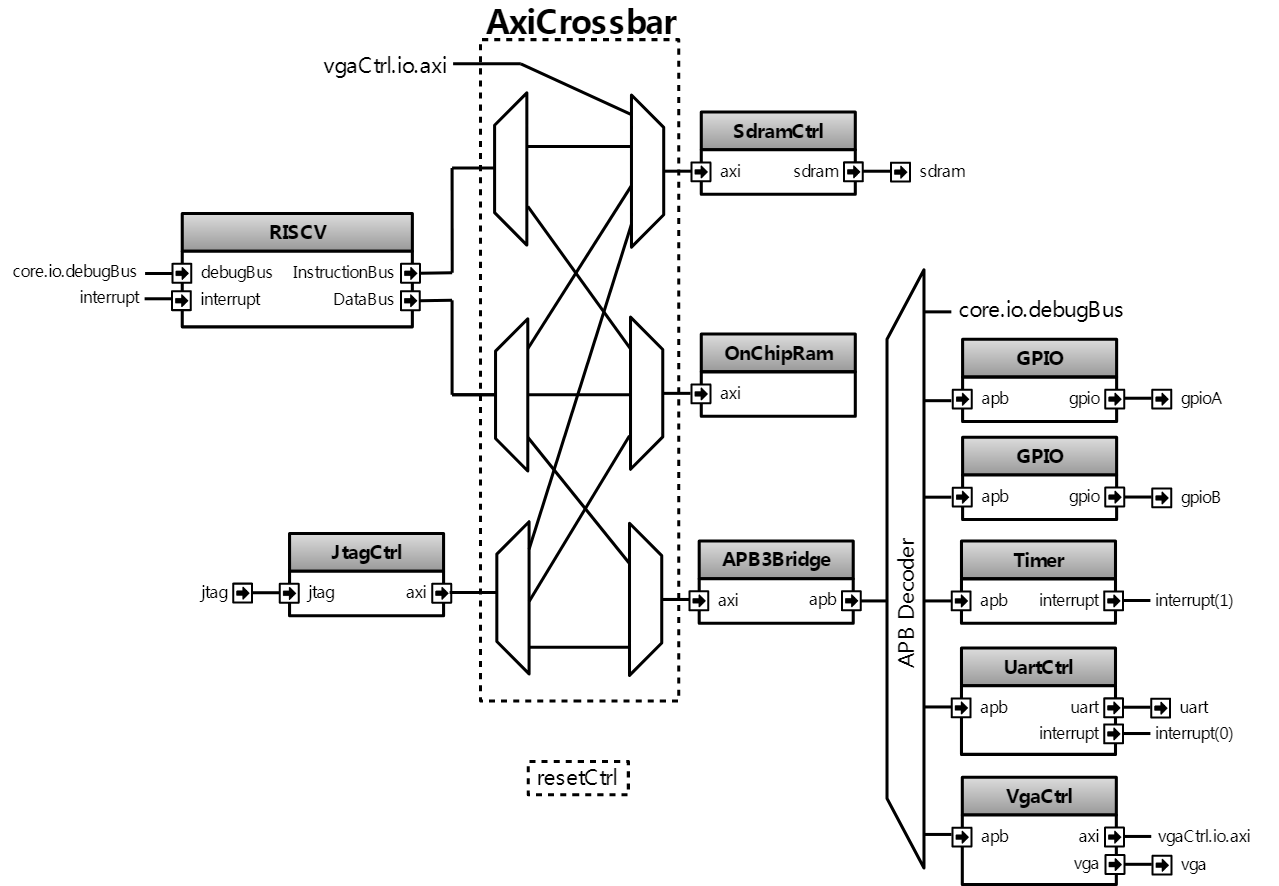

You may have some questions. What does it generate in such a simple way?  
Can I customize the parameter specifications by myself? There is no problem at all.

Please execute the following code snippets in order to customize the SOC

### First Config Cpu


In [ ]:
import spinal.lib.bus.amba3.apb._
import spinal.lib.bus.amba4.axi._
import spinal.lib.com.jtag.Jtag
import spinal.lib.com.uart.{Uart, UartCtrlGenerics, UartCtrlMemoryMappedConfig, Apb3UartCtrl}
import spinal.lib.cpu.riscv.impl.Utils.BR
import spinal.lib.cpu.riscv.impl.build.RiscvAxi4
import spinal.lib.cpu.riscv.impl.extension.{BarrelShifterFullExtension, DivExtension, MulExtension}
import spinal.lib.cpu.riscv.impl._
import spinal.lib.graphic.RgbConfig
import spinal.lib.graphic.vga.{Vga, Axi4VgaCtrlGenerics, Axi4VgaCtrl}
import spinal.lib.io.TriStateArray
import spinal.lib.memory.sdram._
import spinal.lib.system.debugger.{JtagAxi4SharedDebugger, SystemDebuggerConfig}

val myCpuConfig = RiscvCoreConfig(
        pcWidth = 32,
        addrWidth = 32,
        startAddress = 0x00000000,
        regFileReadyKind = sync,
        branchPrediction = dynamic,
        bypassExecute0 = true,
        bypassExecute1 = true,
        bypassWriteBack = true,
        bypassWriteBackBuffer = true,
        collapseBubble = false,
        fastFetchCmdPcCalculation = true,
        dynamicBranchPredictorCacheSizeLog2 = 7
      )

myCpuConfig.add(new MulExtension)
myCpuConfig.add(new DivExtension)
myCpuConfig.add(new BarrelShifterFullExtension)

### Extension your CPU
```scala
myCpuConfig.add(new MulExtension)
myCpuConfig.add(new DivExtension)
myCpuConfig.add(new BarrelShifterFullExtension)
```

If you've developed floating-core or vector processing extensions with Spinal, you can also extension it this way

```scala
myCpuConfig.add(new myFloatExtension)
myCpuConfig.add(new myVectorExtension) 
```

### Config your iCache

In [ ]:
val myiCacheConfig = InstructionCacheConfig(
        cacheSize    = 4096,
        bytePerLine  = 32,
        wayCount     = 1,  //Can only be one for the moment
        wrappedMemAccess = true,
        addressWidth = 32,
        cpuDataWidth = 32,
        memDataWidth = 32
      )

###  ReConfig your Soc

Put the new riscvCpu，iCache config into Soc config，We can get a completely new **Configed Soc System**

In [ ]:
import spinal.lib.memory.sdram.sdr.IS42x320D
val mySocConfig = PinsecConfig(
    axiFrequency   = 100 MHz,
    onChipRamSize  = 4 KiB,
    sdramLayout    = IS42x320D.layout,
    sdramTimings   = IS42x320D.timingGrade7,
    cpu            = myCpuConfig,
    iCache         = myiCacheConfig)

showRtl(new Pinsec(mySocConfig))

## Spinal Global Config
we can config Global setting in SpinalConfig, such like Asynchronous reset with falling age, or generated-dir etc.

In [3]:
object MySpinalConfig extends SpinalConfig(
    defaultConfigForClockDomains = ClockDomainConfig(
                                         resetKind = ASYNC,
                                         clockEdge = RISING, 
                                         resetActiveLevel = LOW)
)
MySpinalConfig.generateVerilog(new Pinsec(500 MHz))

cmd3.sc:7: not found: type Pinsec
val res3_1 = MySpinalConfig.generateVerilog(new Pinsec(500 MHz))
                                                ^Compilation Failed

: 

## Some interesting concepts
The author of spinalhdl gives us all interesting designs, such as clock frequency, time unit, storage space, etc., which are very simple but very useful.

It may provide more expressiveness and abstraction in parametric design.

In [ ]:
val freq = 100 MHz
val time = 10 ms
//val time = 100 $ 100.$() =  return  RBM(100)
val cycle = time * freq 

## Useful Utlis and Lib
- Flow
- Stream
- IMasterSlave
- Fragment
- Bus 
  + AHB-lite3
  + AXI4
  + APB3
  + AvalonMM
- URT
- VGA

## A complete SOC framework
Pinsec is a complete SOC project with a very clear structure, and powerful.  

To coin a phrase: The house sparrow is small,but be fullies equipped 

## More details  
- [SpinalDocument](https://spinalhdl.github.io/SpinalDoc-RTD/index.html)
